<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تمرین کراس
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین قصد داریم به بهانه‌ی حل مسئله‌ی تشخیص سرطان سینه به کمک یک شبکه‌ی عصبی عمیق، نحوه‌ی کار با <code>keras</code> را تمرین کنیم.
مجموعه‌داده‌ی این تمرین در ارتباط با ویژگی‌های استخراج شده از توده‌های سرطانی موجود در سینه‌ی چند بیمار بوده است. برخی ویژگی‌ها از تصاویر دیجیتالی به دست آمده‌اند که خصوصیات هسته‌های سلولی موجود در تصویرهای مذکور را توصیف می‌کنند. هدف این تمرین ساخت یک مدل یادگیری عمیق برای تشخیص خوش‌خیم یا بدخیم بودن سرطان افراد بر اساس ویژگی‌های فوق است.
</font>
</p>


In [1]:
import pandas as pd
import numpy as np

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مجموعه‌داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در مجموعه‌داده‌ای که در اختیار شما قرار گرفته به‌ازای هر داده‌ای که ثبت شده نوع سرطان آن در ستون <code>diagnosis</code> نوشته شده است. دو وضعیت موجود در این ستون عبارتند از:

</font>
</p>

<center>
<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>

| مقدار | نوع سرطان |
| :---: | :---: |
| <code>M</code> | بدخیم |
| <code>B</code> | خوش‌خیم |

</font>
</p>
</center>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در ابتدا داده‌ها را از فایل <code>data</code> موجود در پوشه بخوانید.
سپس باید ستون (<code>Unnamed: 32</code>) را حذف کنید. همچنین می‌توانید ستون <code>id</code> را نیز حذف کنید.
</font>
</p>


In [2]:
df = pd.read_csv('data.csv') # To-Do (Load the csv file)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
# To-Do (Drop columns)
df = df.drop(columns=['Unnamed: 32', 'id'], axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">تحلیل اکتشافی داده</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در اولین قدم پیشنهاد می‌کنیم کمی به بررسی دقیق‌تر و آماری داده‌هایی که در دسترس‌تان است بپردازید و در صورت علاقه نمودارهایی را جهت بررسی توزیع‌های داده رسم کنید. به‌عنوان مثال بررسی این‌که کدام ویژگی‌ها همبستگی بیشتری با نتیجه/هدف/برچسب دارند و این‌که آیا داده‌ها از منظر ستون هدف/برچسب متوازن است و مانند آن.
حداقل چهار گزارش از داده‌های موجود ارائه دهید.
نیازی به گزارش‌های پیچیده نیست و اگر کمک به فهم بهتر از داده‌ها کند مورد قبول است.
</font>
</p>

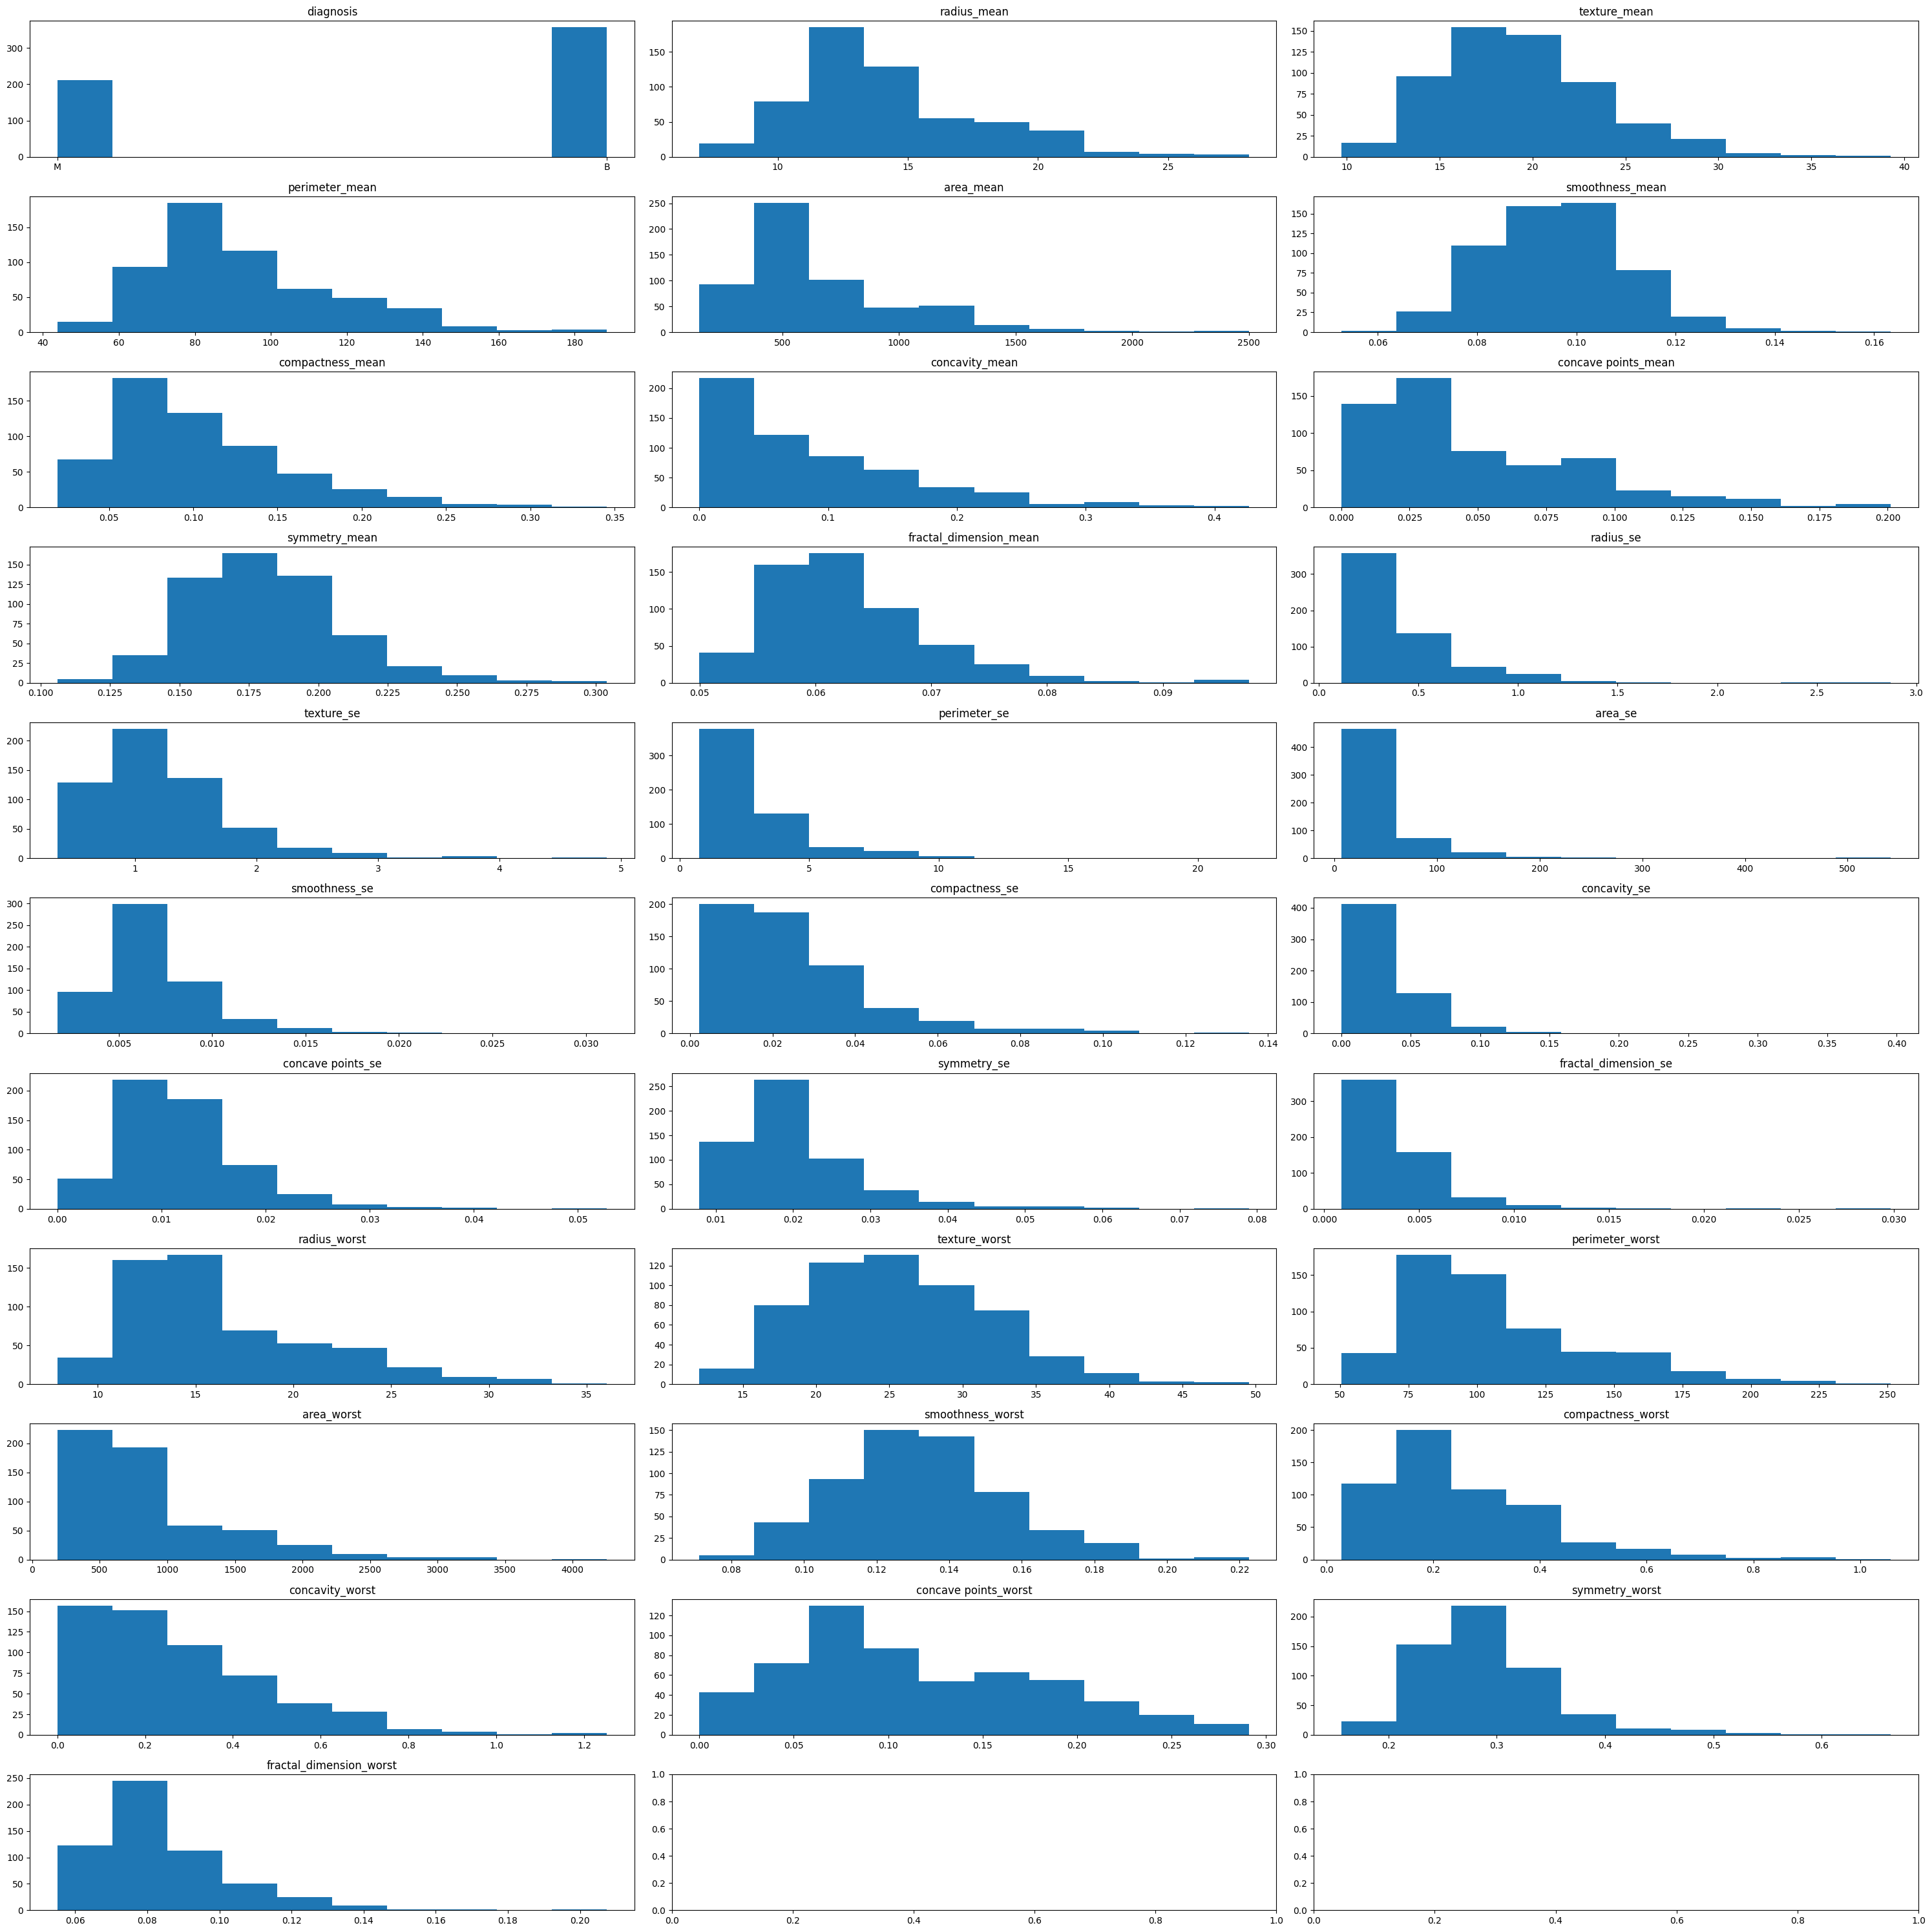

In [4]:
import matplotlib.pyplot as plt

# Plot the distibution of each feature

# create subplots
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(30, 30))

# iterate over features
for i in range(df.shape[1]):
  # plot hist
  axes[i // 3][i % 3].hist(df[df.columns[i]])
  # set title
  axes[i // 3][i % 3].set_title(df.columns[i])

# show plot
plt.tight_layout()
plt.show()

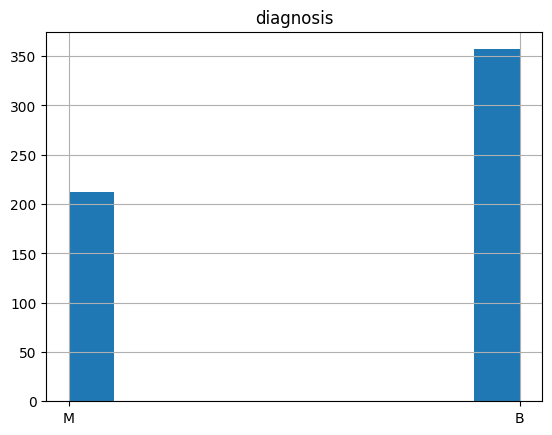

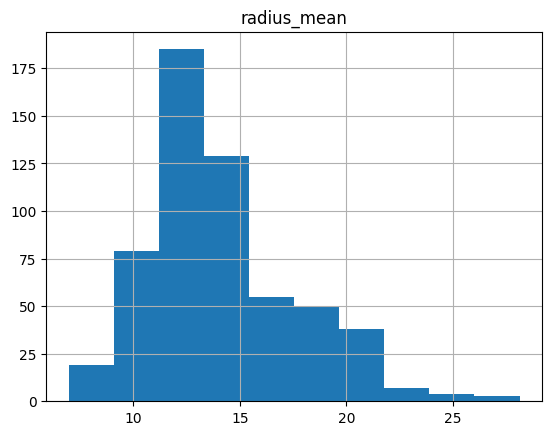

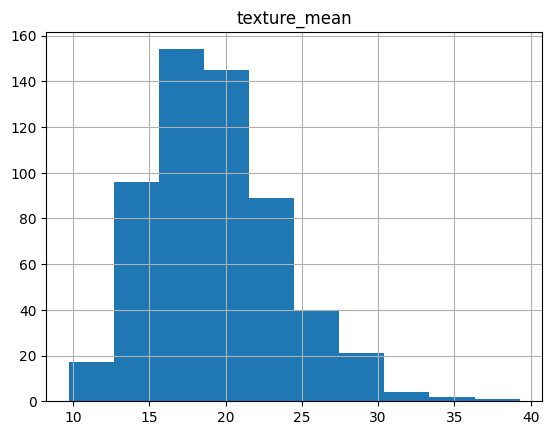

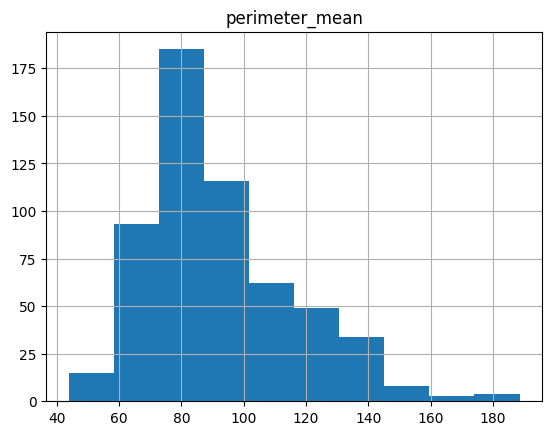

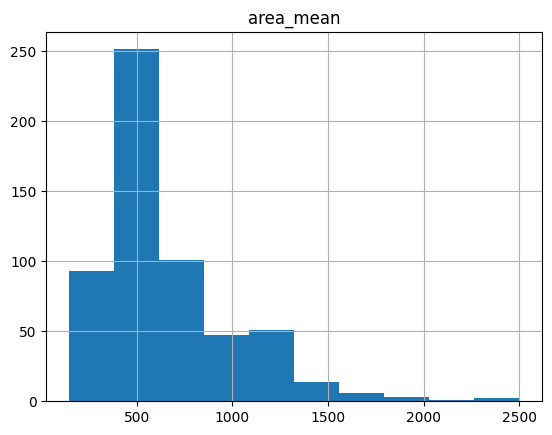

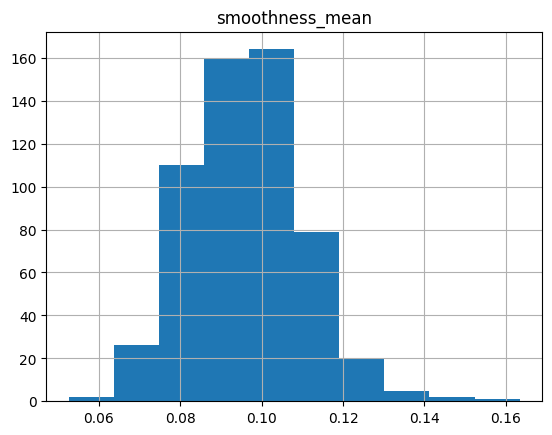

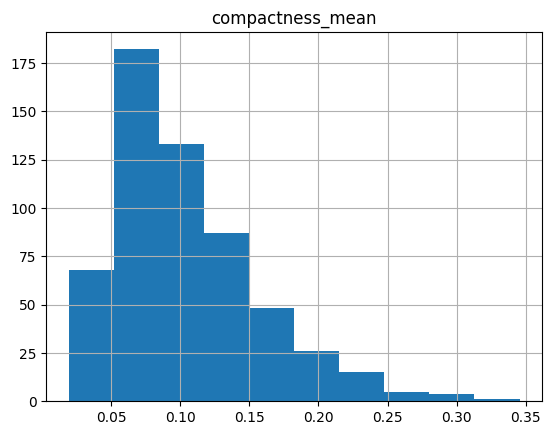

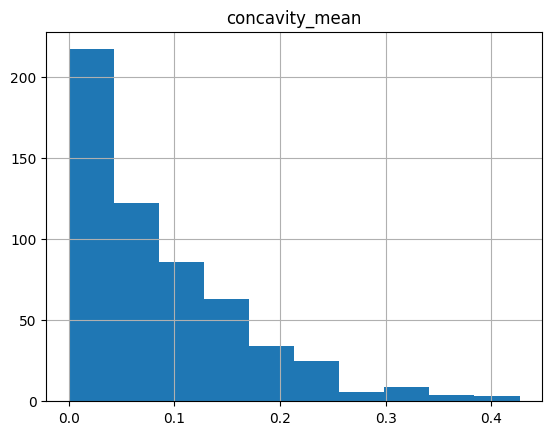

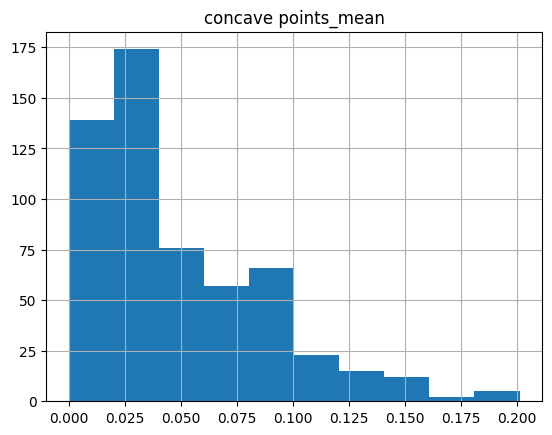

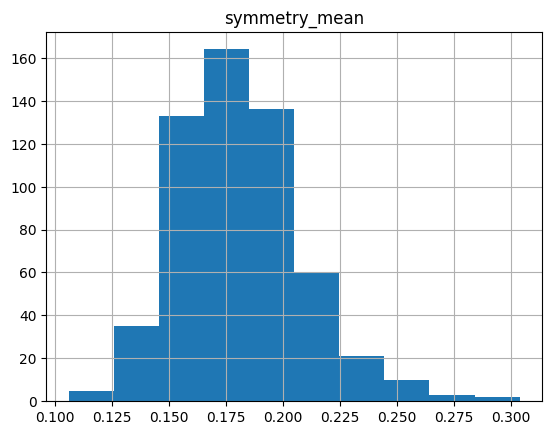

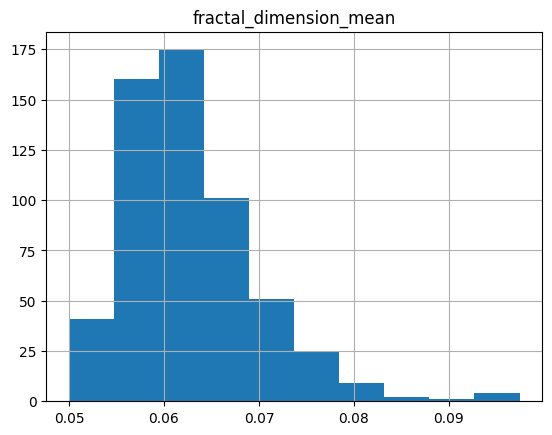

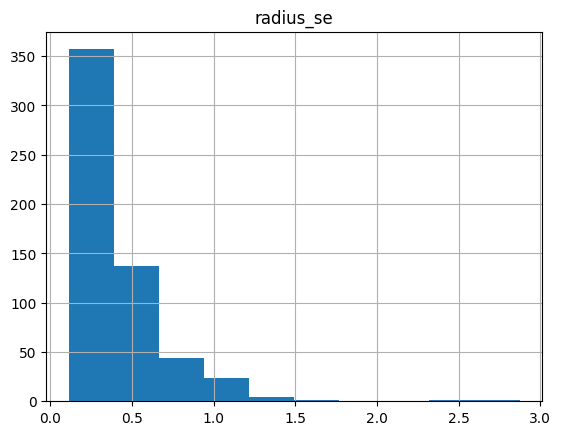

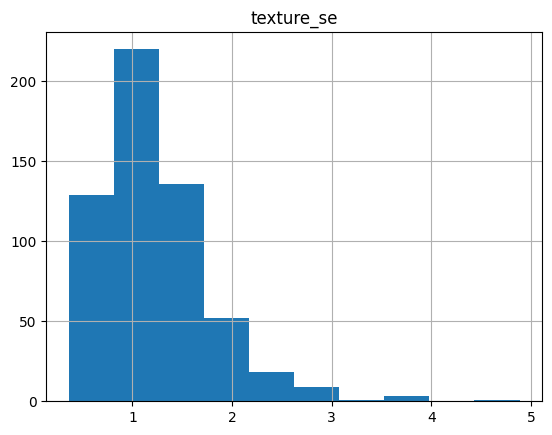

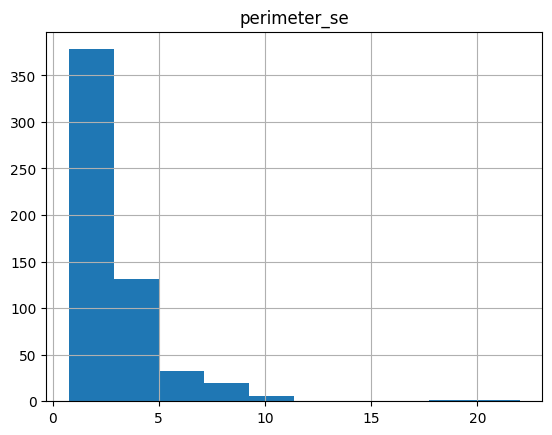

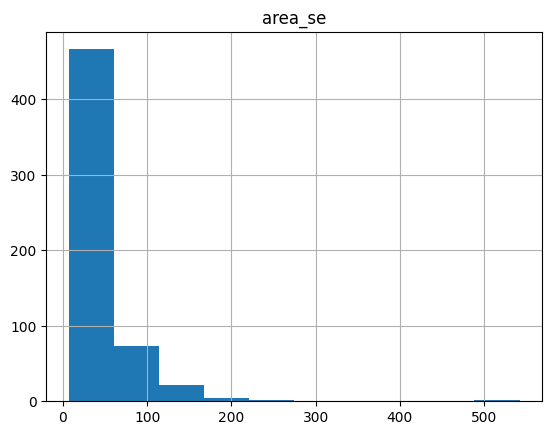

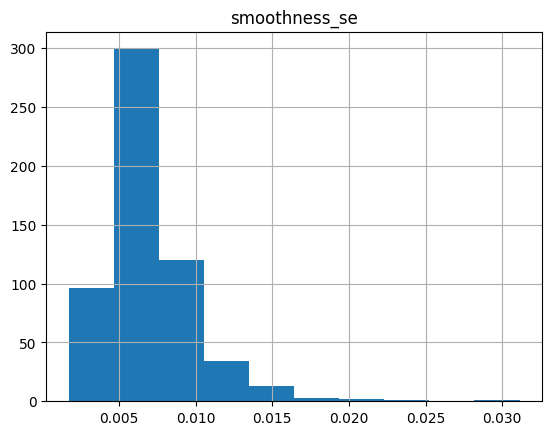

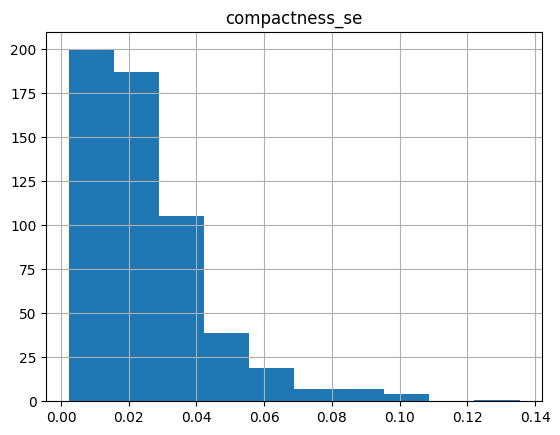

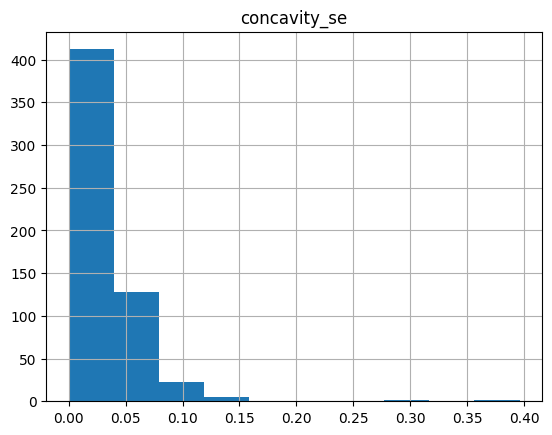

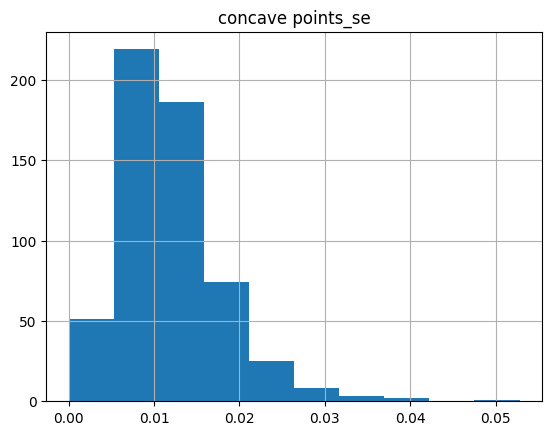

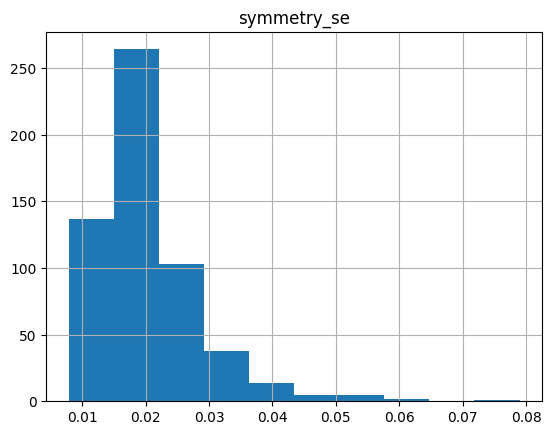

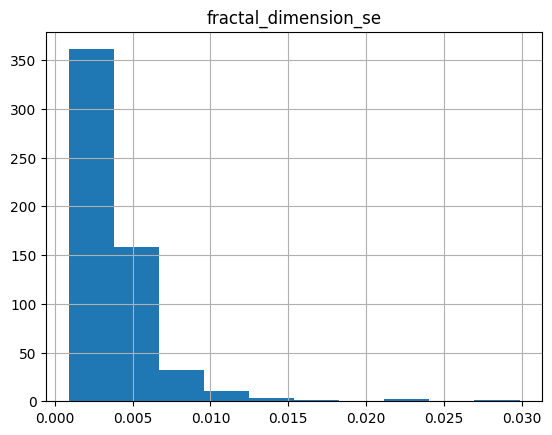

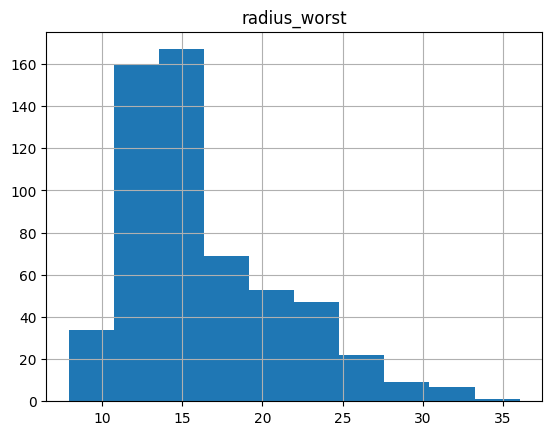

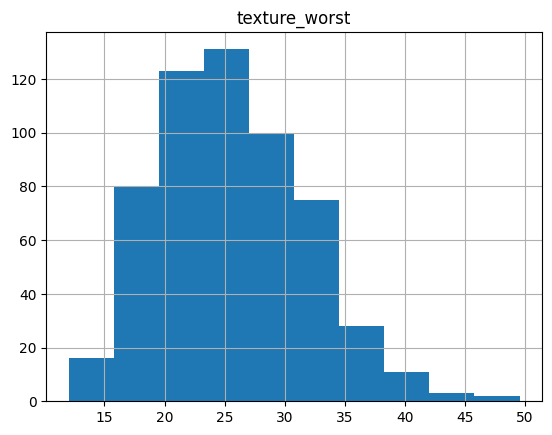

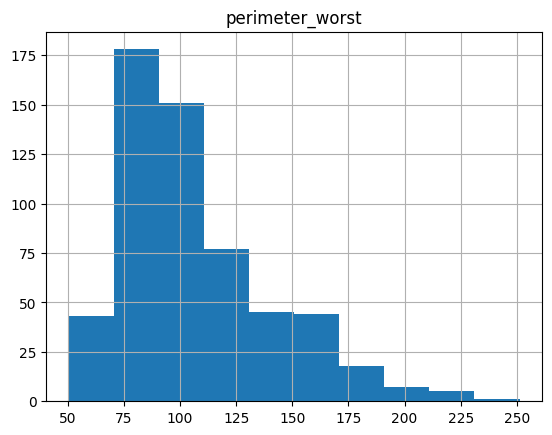

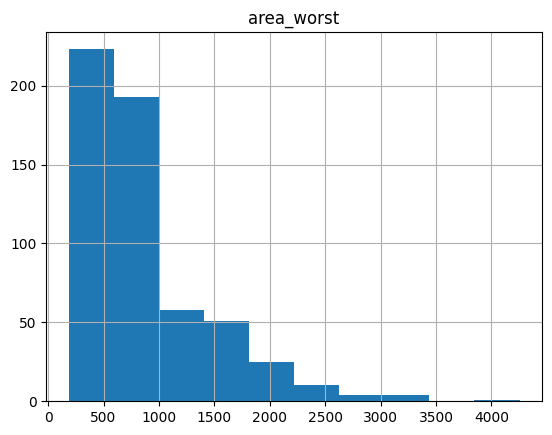

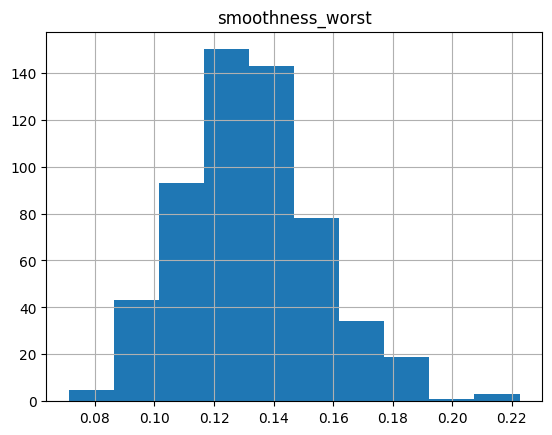

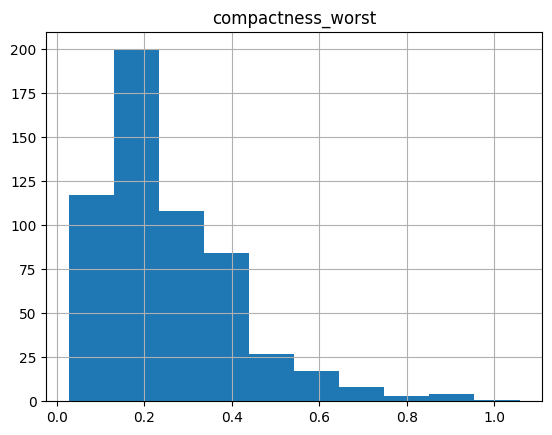

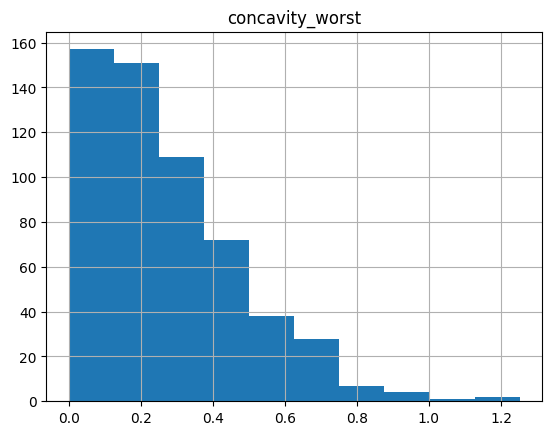

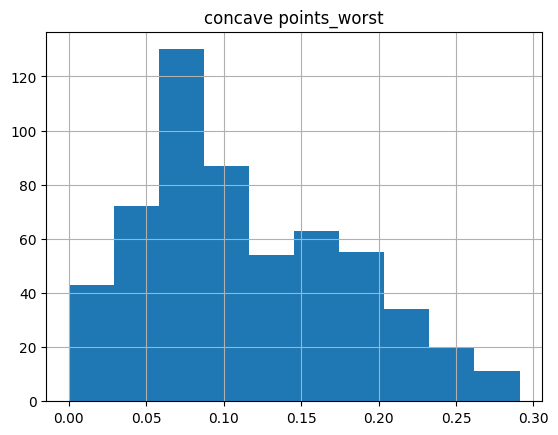

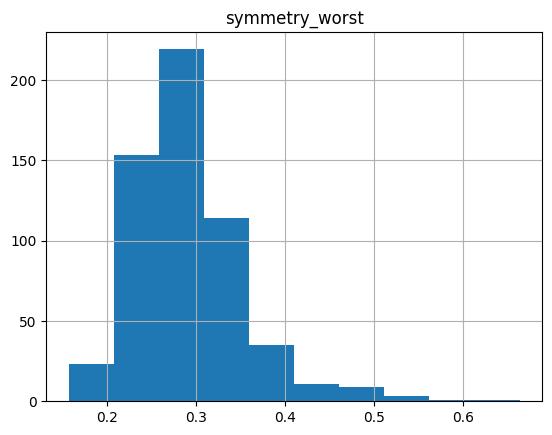

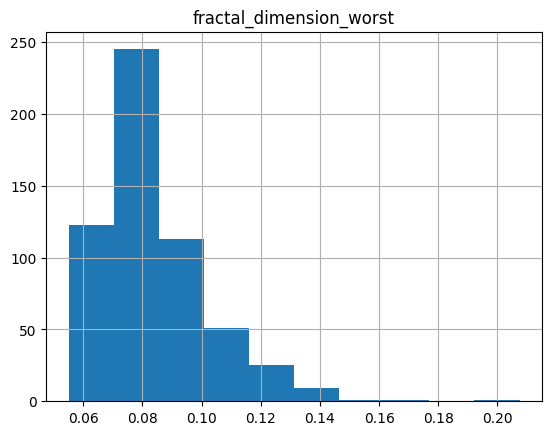

In [5]:
# To-Do (EDA)
import matplotlib.pyplot as plt

# Plot the distibution of each feature
for i in range(df.shape[1]):
  plt.figure()
  df[df.columns[i]].hist()
  plt.title(df.columns[i])
  plt.show()

<ipython-input-6-72932f7cc4b1>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


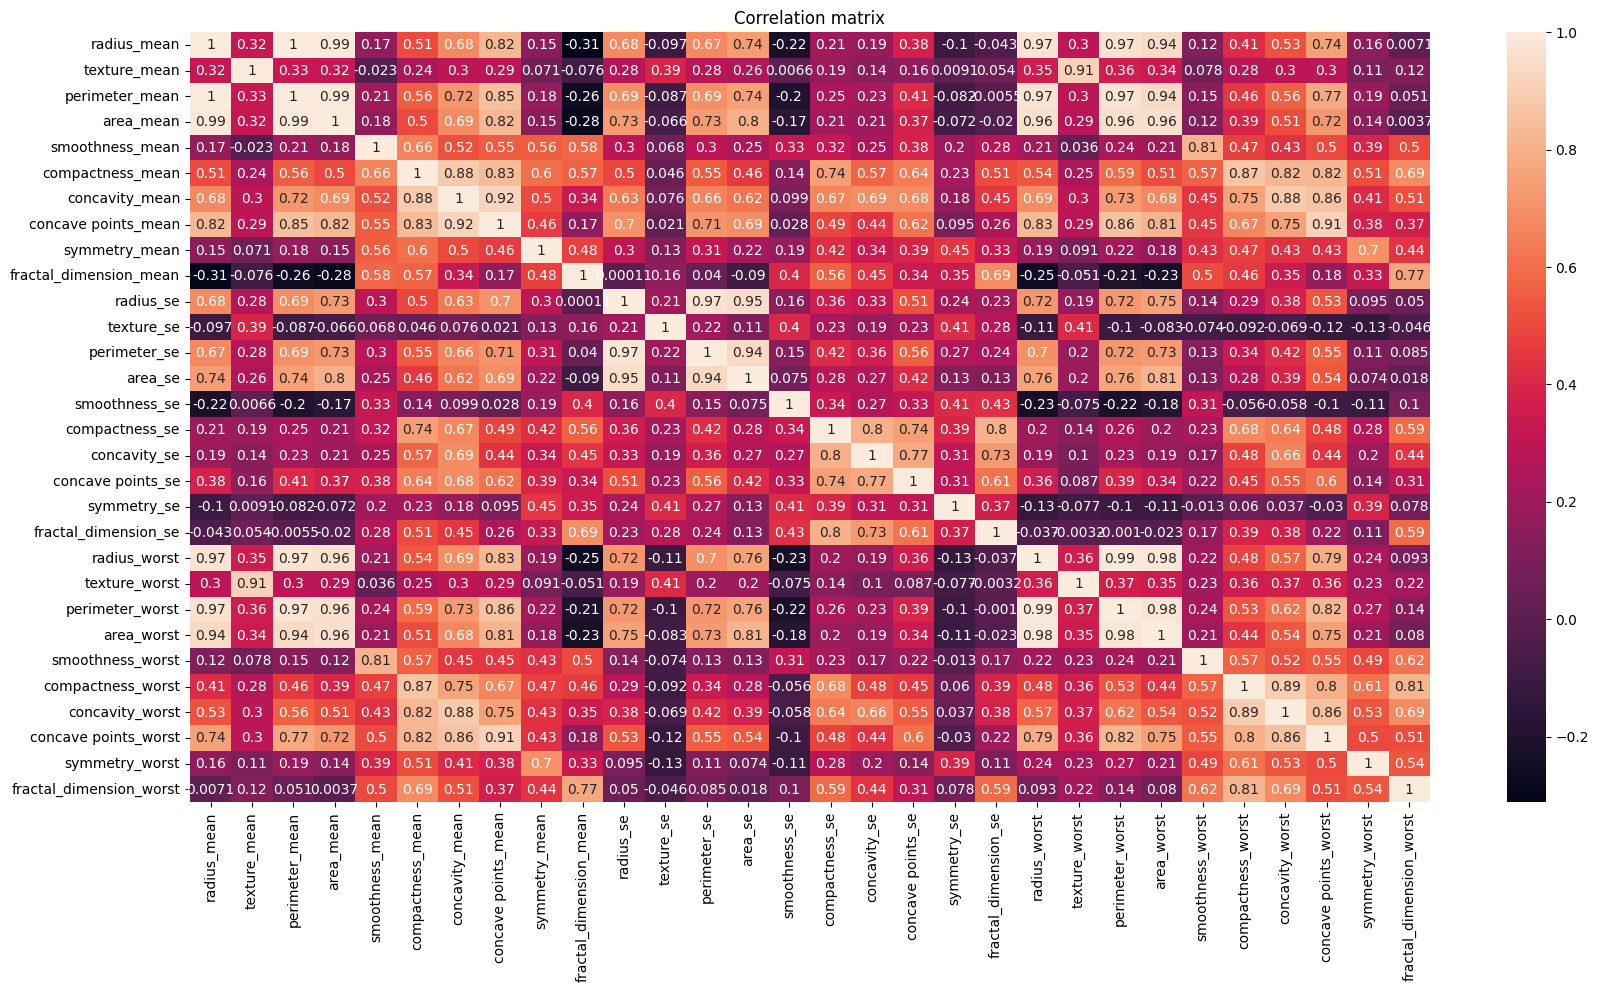

In [6]:
import seaborn as sns

# Calculate the correlation matrix
corr = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True)
plt.title('Correlation matrix')
plt.show()

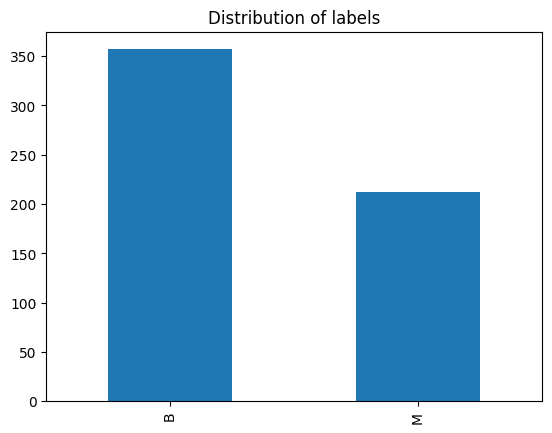

In [7]:
# Plot the distribution of labels
plt.figure()
df['diagnosis'].value_counts().plot(kind='bar')
plt.title('Distribution of labels')
plt.show()

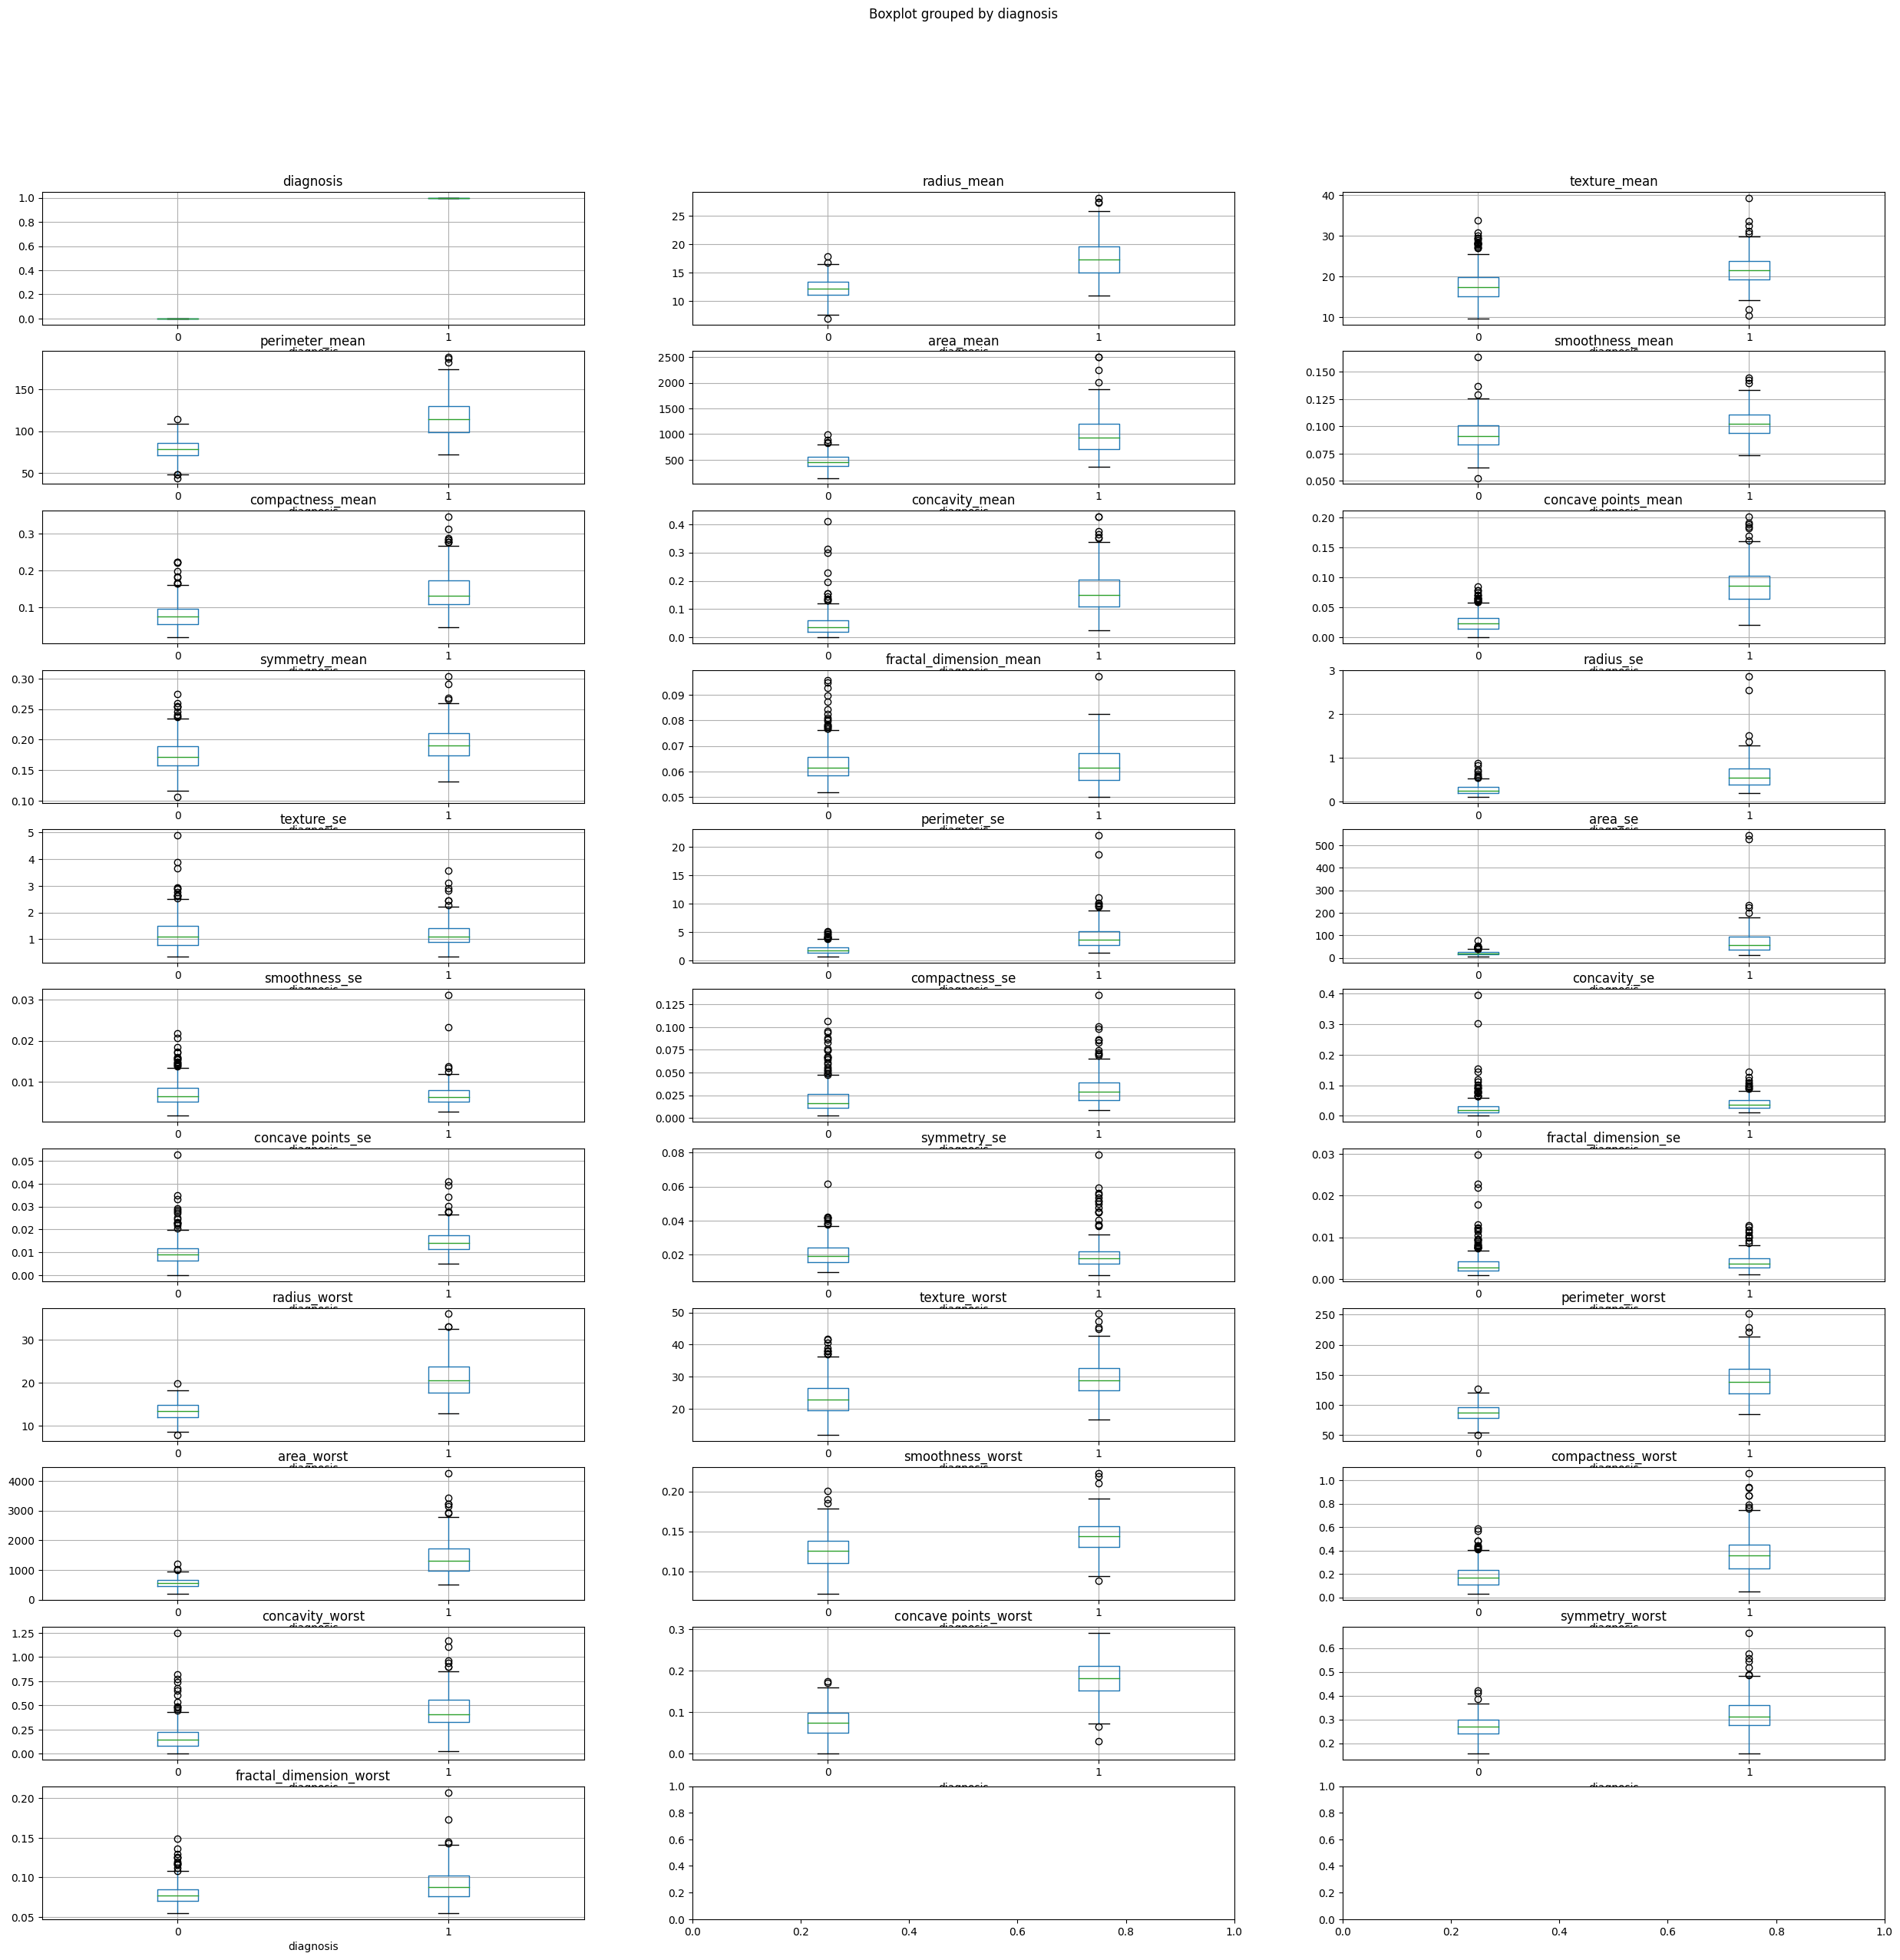

In [8]:
# plot the distribution of features by labels
df['diagnosis'] = df['diagnosis'].astype('category').cat.codes

# create subplots
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(30, 30))

# iterate over features
for i in range(df.shape[1]):
  # plot boxplot
  df.boxplot(column=df.columns[i], by='diagnosis', ax=axes[i // 3][i % 3])
  # set title
  axes[i // 3][i % 3].set_title(df.columns[i])

# show plot
plt.show()

<Figure size 640x480 with 0 Axes>

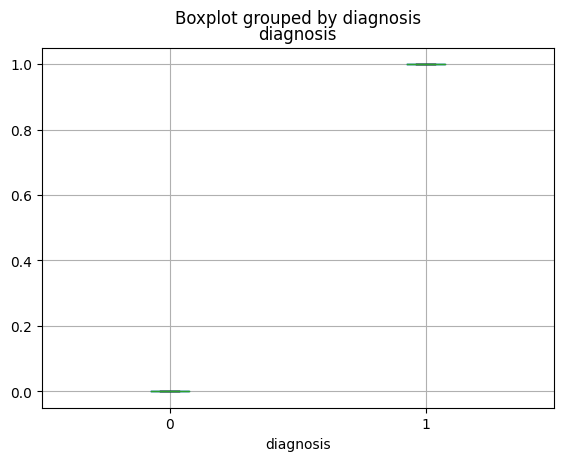

<Figure size 640x480 with 0 Axes>

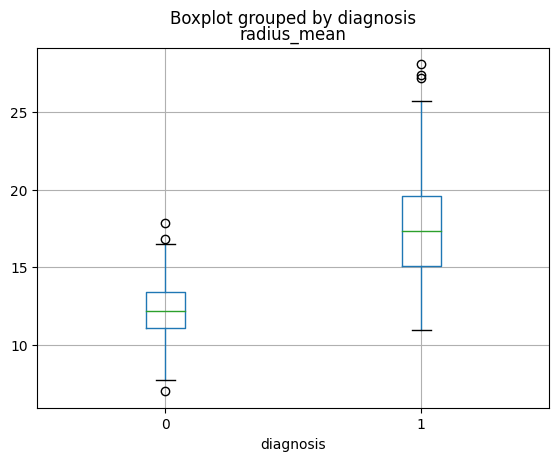

<Figure size 640x480 with 0 Axes>

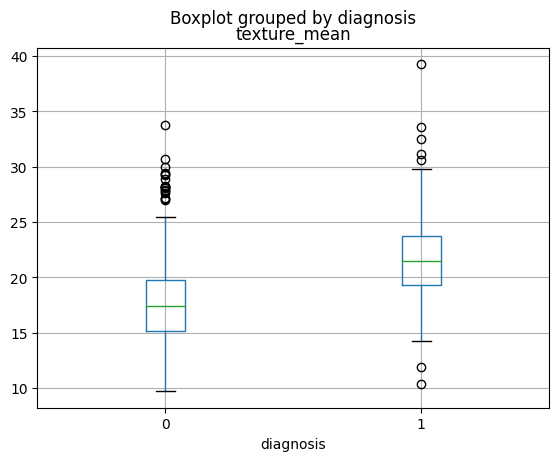

<Figure size 640x480 with 0 Axes>

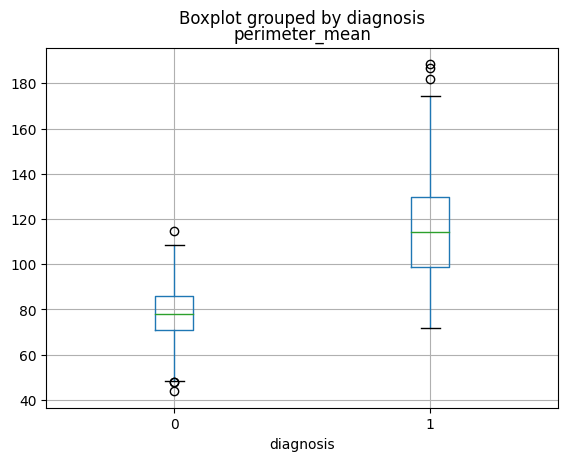

<Figure size 640x480 with 0 Axes>

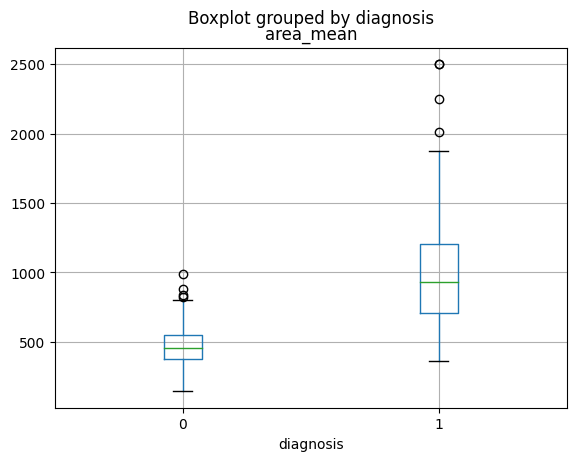

<Figure size 640x480 with 0 Axes>

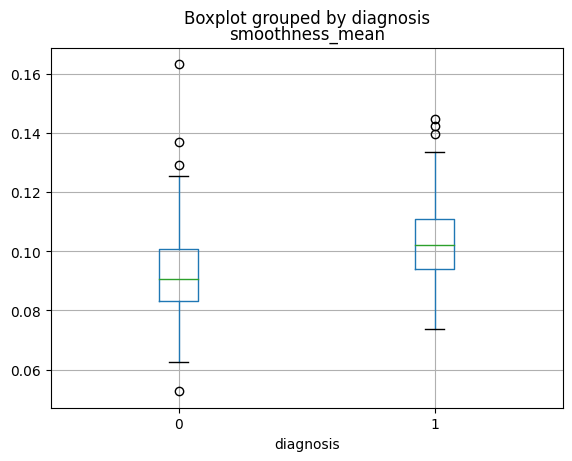

<Figure size 640x480 with 0 Axes>

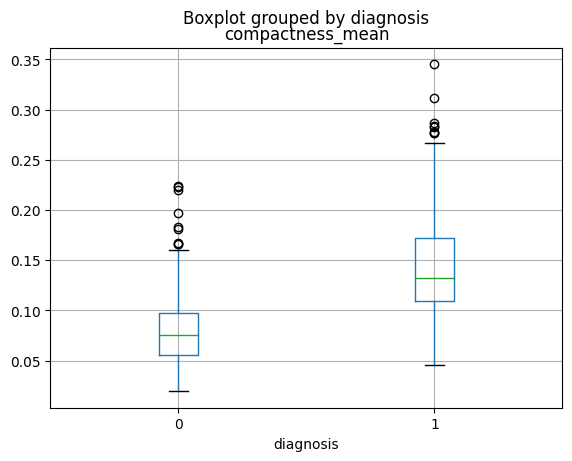

<Figure size 640x480 with 0 Axes>

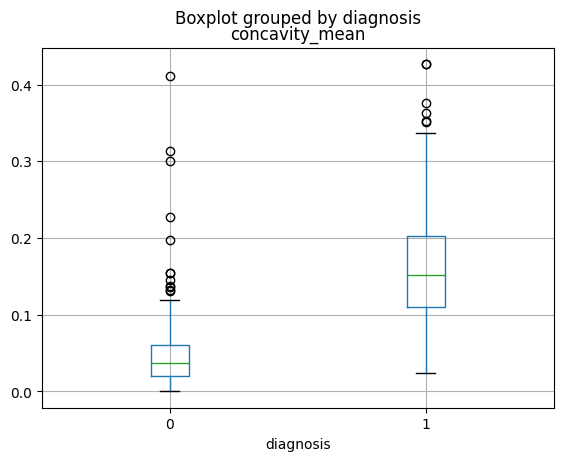

<Figure size 640x480 with 0 Axes>

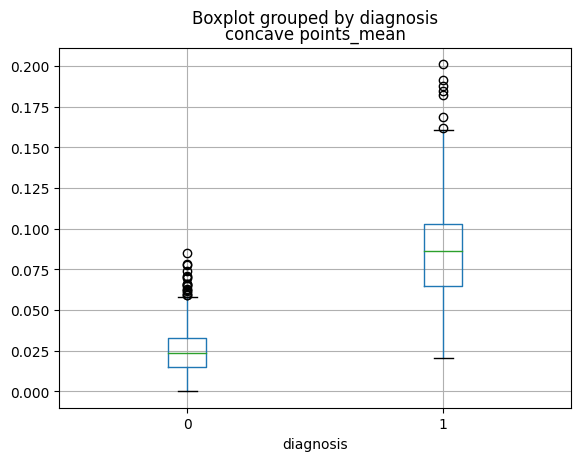

<Figure size 640x480 with 0 Axes>

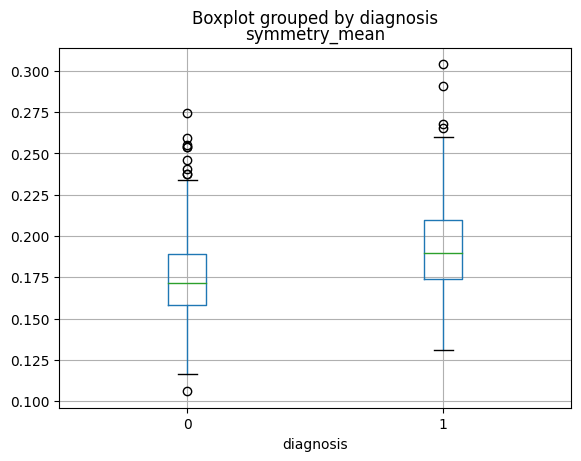

<Figure size 640x480 with 0 Axes>

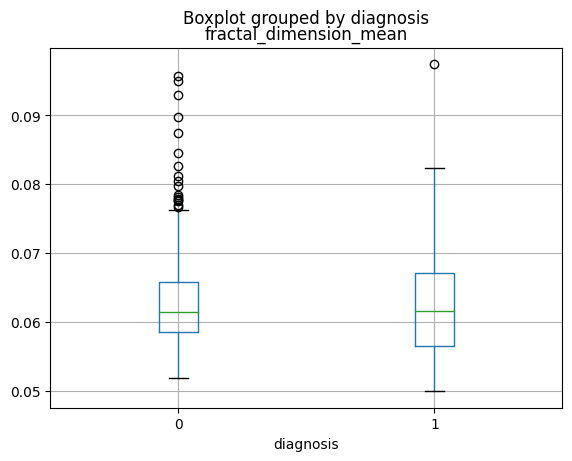

<Figure size 640x480 with 0 Axes>

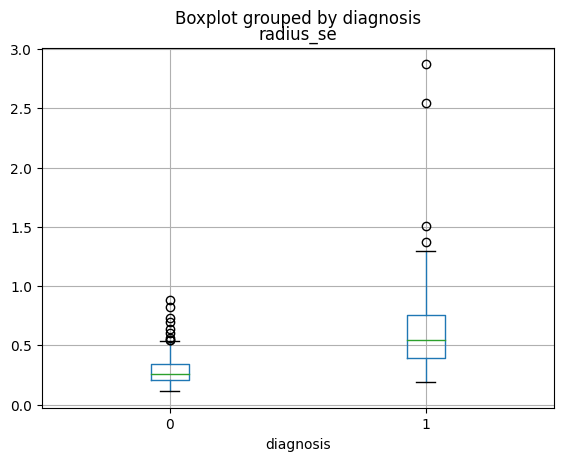

<Figure size 640x480 with 0 Axes>

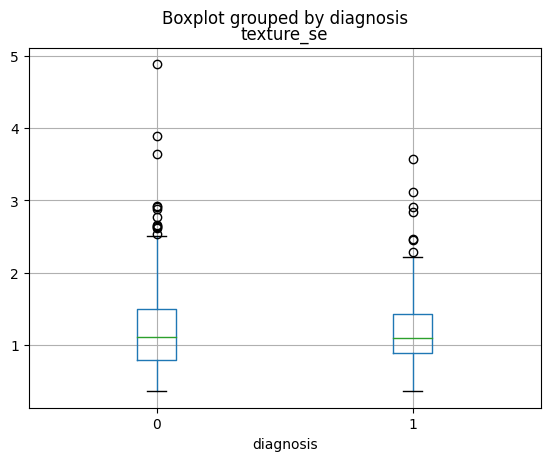

<Figure size 640x480 with 0 Axes>

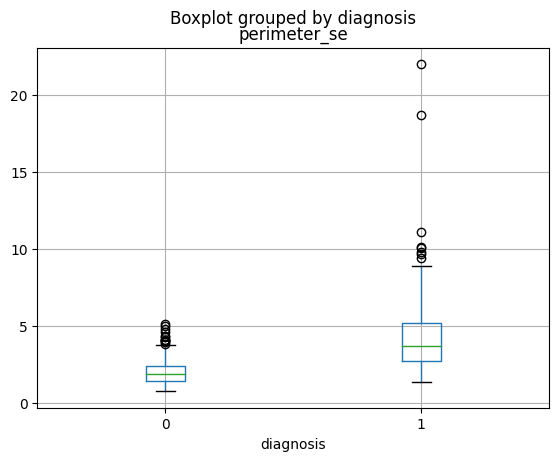

<Figure size 640x480 with 0 Axes>

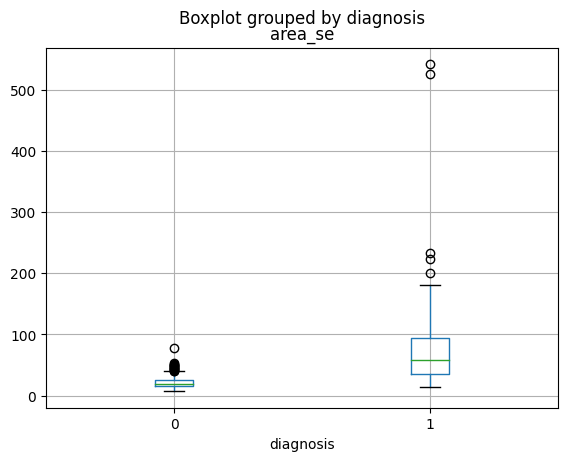

<Figure size 640x480 with 0 Axes>

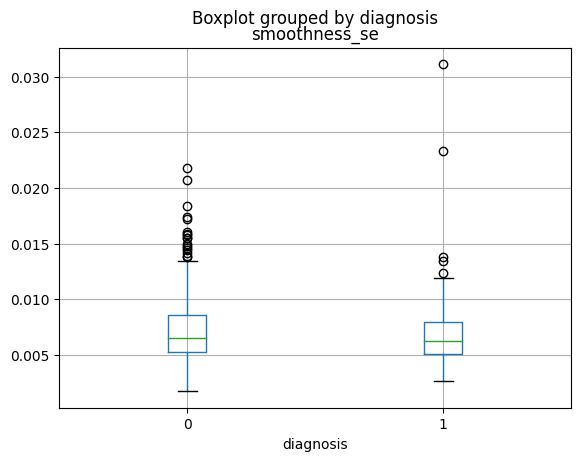

<Figure size 640x480 with 0 Axes>

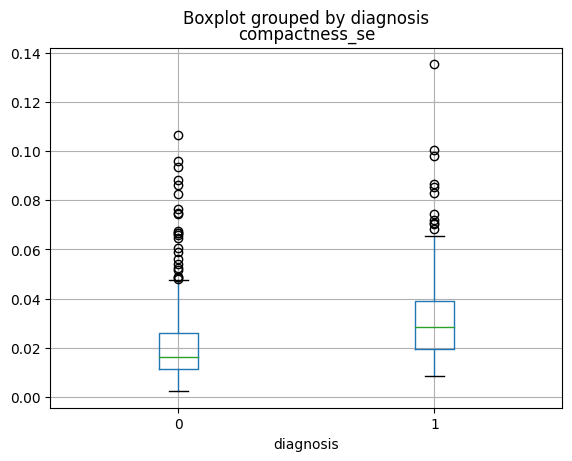

<Figure size 640x480 with 0 Axes>

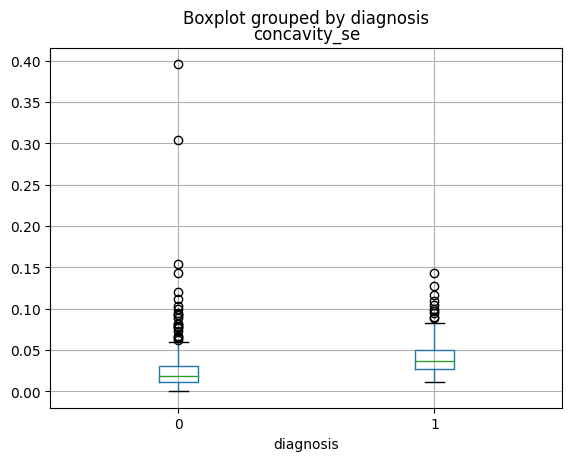

<Figure size 640x480 with 0 Axes>

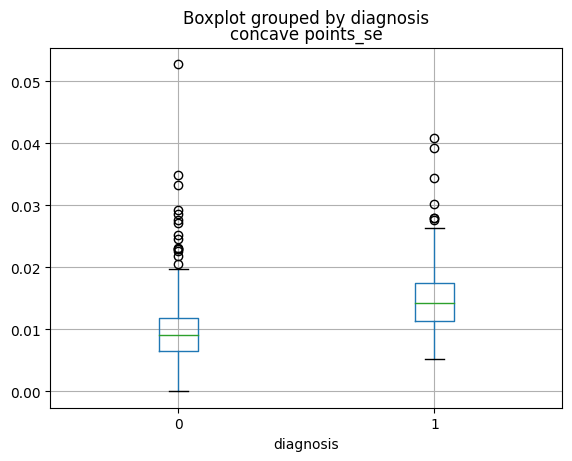

<Figure size 640x480 with 0 Axes>

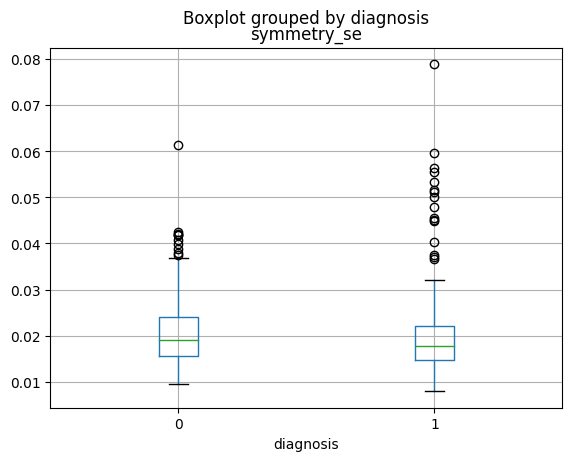

<Figure size 640x480 with 0 Axes>

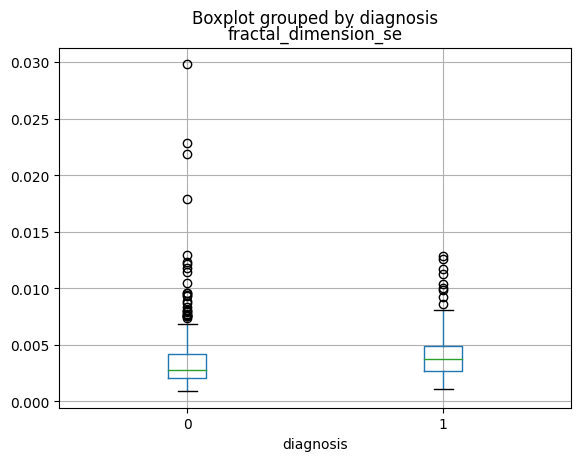

<Figure size 640x480 with 0 Axes>

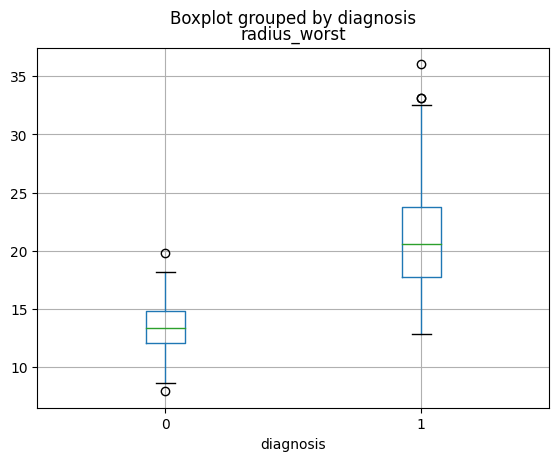

<Figure size 640x480 with 0 Axes>

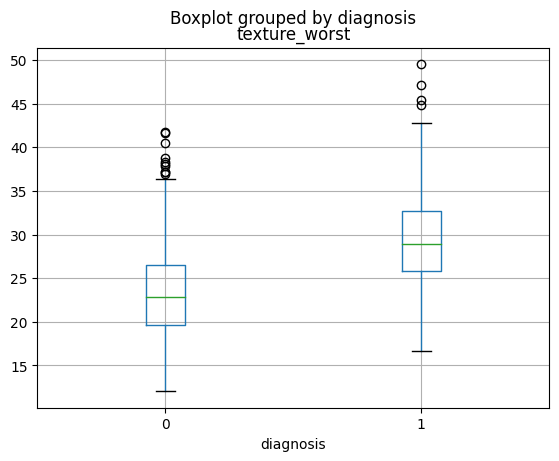

<Figure size 640x480 with 0 Axes>

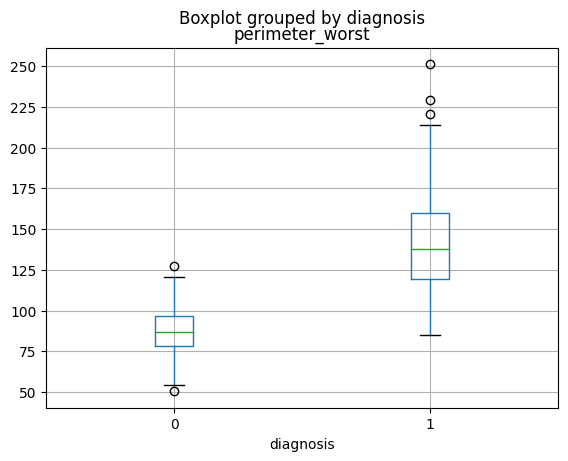

<Figure size 640x480 with 0 Axes>

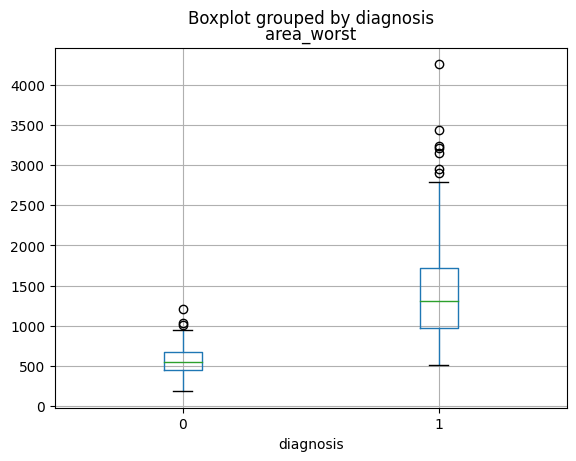

<Figure size 640x480 with 0 Axes>

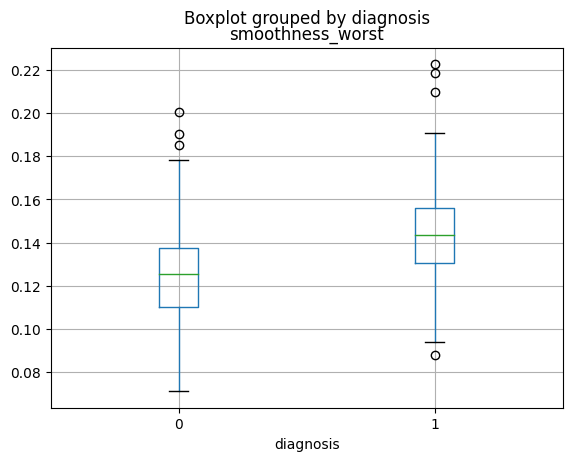

<Figure size 640x480 with 0 Axes>

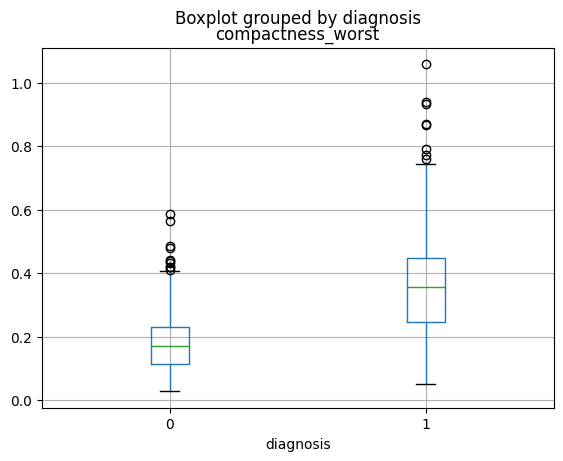

<Figure size 640x480 with 0 Axes>

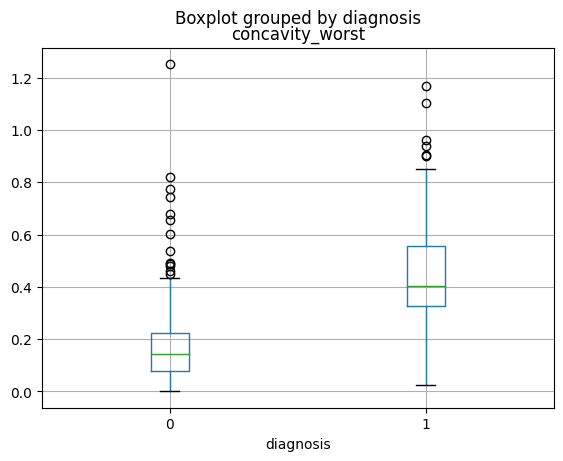

<Figure size 640x480 with 0 Axes>

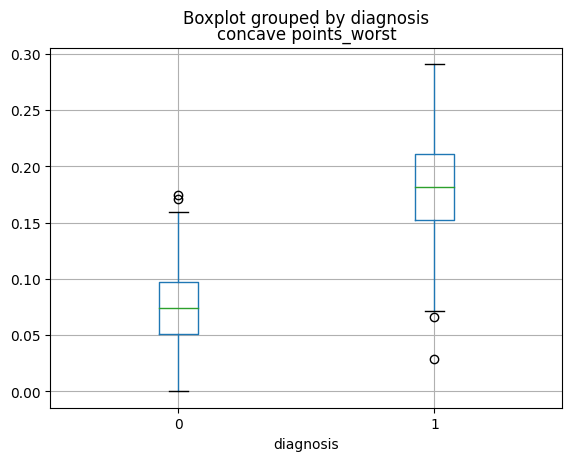

<Figure size 640x480 with 0 Axes>

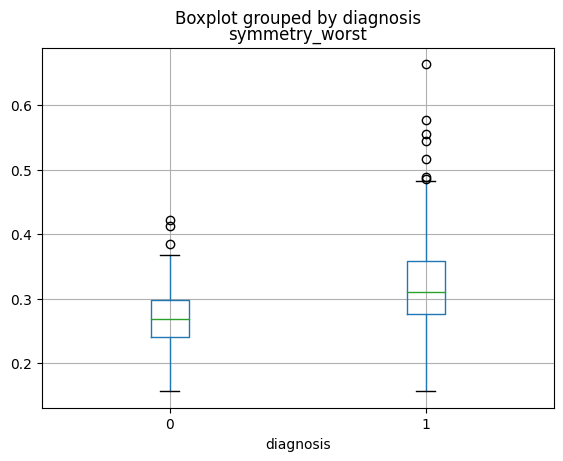

<Figure size 640x480 with 0 Axes>

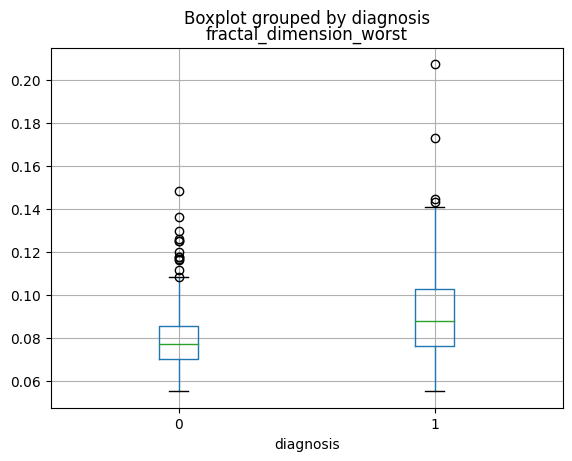

In [9]:
# plot the distribution of features by labels
df['diagnosis'] = df['diagnosis'].astype('category').cat.codes
for i in range(df.shape[1]):
  plt.figure()
  df.boxplot(column=df.columns[i], by='diagnosis')
  plt.title(df.columns[i])
  plt.show()

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">پیش‌پردازش داده‌ها</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
حال به سراغ آماده‌سازی داده‌ها برای مدل‌سازی برویم..
<br>
داده‌ها را به دو مجموعه‌ی آموزشی (<code>train</code>) و آزمون (<code>test</code>) جدا کنید. بدین منظور ۲۰ درصد داده‌ها را برای آزمون در نظر بگیرید و <code>random_state=42</code> قرار دهید. در صورت تمایل می‌توانید بخشی از مجموعه‌ی آموزشی را جدا کرده و برای اعتبارسنجی (<code>validation</code>) استفاده کنید.
هم‌چنین داده‌های دسته‌ای (categorical) را کذگذاری (encode) کنید.
<br>
تصمیم‌گیری استفاده از تکنیک‌های دیگر همچون نرمال‌سازی بر عهده‌ی خودتان است.
</font>
</p>

In [10]:
X = df.drop('diagnosis', axis=1) # To-Do (Get the features)
y = df['diagnosis'] # To-Do (Get the target)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Split the validation and test sets further
#X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=2/3, random_state=42)

# Print the shapes of the data
print('X_train shape: ', X_train.shape)
#print('X_val shape: ', X_val.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
#print('y_val shape: ', y_val.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (455, 30)
X_test shape:  (114, 30)
y_train shape:  (455,)
y_test shape:  (114,)


In [12]:
# To-Do (Other preprocessing steps)
# Encode the categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">مدل‌سازی</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون می‌توانید با استفاده از الگوریتم‌های یادگیری عمیق مدلی آموزش دهید که بر اساس مقادیر ویژگی‌های موجود، نوع سرطان را پیش‌بینی کند.
در این قسمت از شما می‌خواهیم به دو صورت <code>Sequential</code> و <code>Functional</code> مدلی طراحی کنید و آن‌ها را با هم قیاس کنید تا با تفاوت روش‌های مختلف ساخت مدل در کراس آشنا شوید.
برای مطالعه و مشاهده‌ی بیشتر تفاوت این دو نوع مدل به <a href="https://medium.com/analytics-vidhya/keras-model-sequential-api-vs-functional-api-fc1439a6fb10">این لینک</a>  یا <a href="https://www.analyticsvidhya.com/blog/2021/07/understanding-sequential-vs-functional-api-in-keras/">این لینک</a> می‌توانید نگاه کنید.
<br>
 تابع هزینه (<code>loss</code>) و بهینه‌ساز (<code>optimizer</code>) را براساس تشخیص خود، انتخاب کنید.
    
</font>
</p>

In [13]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from tensorflow.keras.layers import Dropout, Dense, Input, concatenate
from tensorflow.keras.regularizers import L2

<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">
مدل‌سازی <code>Sequential</code>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت نیاز است به کمک روش <code>Sequential</code> مدل زیر را پیاده کنید. در صورتی‌که قصد بررسی ساختار مدل خود و ترسیم شکلی همچون شکل زیر دارید می‌توانید از تابع <code>keras.utils.plot_model</code> کمک بگیرید (برای اطلاعات بیشتر <a href="https://keras.io/api/utils/model_plotting_utils/">این لینک</a> را مطالعه کنید).
<br>
تعداد نورون‌های هر لایه و تابع فعال‌ساز آن در شکل قابل مشاهده است. سایر اطلاعات مورد نیاز عبارتند از:
<ul dir=rtl>
<li>
لایه‌های <code>Dense_2</code>، <code>Dense_4</code> و <code>Output</code> با روش <code>GlorotNormal</code> مقداردهی اولیه شوند.
</li>
<li>
لایه‌های <code>Dense_3</code> و <code>Dense_3</code> با روش <code>HeNormal</code> مقداردهی اولیه شوند.
</li>
<li>
احتمال Dropout را در <code>Dropout_1</code> و <code>Dropout_2</code> برابر <code>0.2</code> قرار دهید.
</li>
<li>
احتمال Dropout را در <code>Dropout_3</code>، <code>Dropout_4</code> و <code>Dropout_5</code> برابر <code>0.3</code> قرار دهید.
</li>
<li>
برای لایه‌های <code>Dense_2</code> تا <code>Dense_5</code> و همچنین لایه‌ی <code>Output</code> از رگولاریزیشن <code>L2</code> استفاده کنید و مقدار ضریب آن را <code>0.02</code> قرار دهید.
</ul>
    
</font>
</p>

<center>
<div style="max-width:600px">
<img src="sequential_model.png" >
</div>
</center>

In [14]:
# Define the model
model = Sequential()

# To-Do (Add layers)

# Dense-1-Input
model.add(Input(shape=(30,)))

    # Dense-1
model.add(Dense(40, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=L2(0.02)))
    # Dropout-1
model.add(Dropout(0.2))

    # Dense-2
model.add(Dense(30, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=L2(0.02)))
    # Dropout-2
model.add(Dropout(0.2))

    # Dense-3
model.add(Dense(15, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(0.02)))
    # Dropout-3
model.add(Dropout(0.3))

    # Dense-4
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(0.02)))

    # Dropout-4
model.add(Dropout(0.3))

    # Dense-5
model.add(Dense(5, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(0.02)))

    # Dropout-5
model.add(Dropout(0.3))

# Add the output layer
model.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal', kernel_regularizer=L2(0.02)))

# To-Do (Replace None with your choice of loss function and optimizer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.build((None, X_train.shape[1]))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1240      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

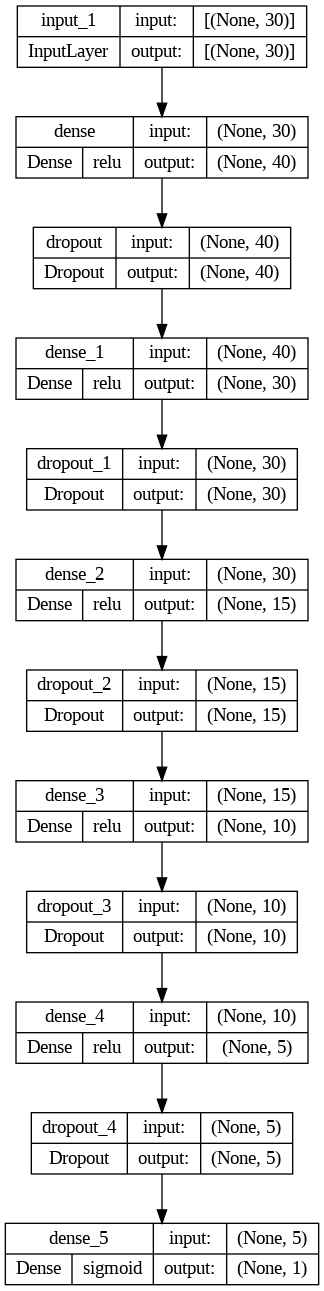

In [15]:
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True, to_file='ans_sequential_model.png')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از ساخت مدل آن را برای ۲۰۰ دور و با اندازه‌ی دسته (batch) معادل ۳۲ آموزش دهید. همچنین بُر زدن (shuffle) داده‌ها را فعال کنید. در صورت علاقه می‌توانید به کمک آرگومان <code>validation_split</code> از بخشی از داده‌های آموزشی برای اعتبارسنجی استفاده کنید (مقدار پیشنهادی <code>0.2</code> است).
<br>
پس از آموزش مدل، مقدار <code>loss</code> و <code>accuracy</code> را برای داده‌های آموزشی و آزمون محاسبه کرده و چاپ کنید.
</font>
</p>

In [16]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, shuffle=True) # To-Do (Fit the model)

Epoch 1/200
12/12 [==============================] - 2s 26ms/step - loss: 3.2965 - accuracy: 0.5577 - val_loss: 3.1025 - val_accuracy: 0.7802
Epoch 2/200
12/12 [==============================] - 0s 5ms/step - loss: 3.1127 - accuracy: 0.6209 - val_loss: 2.9147 - val_accuracy: 0.8901
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 2.9195 - accuracy: 0.6703 - val_loss: 2.7359 - val_accuracy: 0.9011
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 2.7719 - accuracy: 0.6703 - val_loss: 2.5682 - val_accuracy: 0.9231
Epoch 5/200
12/12 [==============================] - 0s 7ms/step - loss: 2.6071 - accuracy: 0.7060 - val_loss: 2.4128 - val_accuracy: 0.9231
Epoch 6/200
12/12 [==============================] - 0s 5ms/step - loss: 2.4749 - accuracy: 0.7363 - val_loss: 2.2733 - val_accuracy: 0.9231
Epoch 7/200
12/12 [==============================] - 0s 6ms/step - loss: 2.3459 - accuracy: 0.7802 - val_loss: 2.1383 - val_accuracy: 0.9341
Epoch 8/200


In [17]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=0) # To-Do (Evaluate the model on train data)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

loss, accuracy = model.evaluate(X_test, y_test, verbose=0) # To-Do (Evaluate the model on test data)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Train Loss: 0.2684, Train Accuracy: 0.9802
Test Loss: 0.2756, Test Accuracy: 0.9825


<h3 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">
مدل‌سازی <code>Functional</code>
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
مدل‌سازی به این روش دست شما را برای طراحی‌های آزادانه‌تر و پیچیده‌تر باز می ‌گذارد. به‌عنوان مثال می‌توانید شاخه‌های مختلفی در مدل خود ایجاد کنید. در این قسمت مدلی که در تصویر زیر مشاهده می‌کنید را پیاده‌سازی کنید. شاخه‌ی سمت چپ مدل دقیقاْ مشابه با مدل قبلی است ولی شاخه‌ی سمت راست مدل همان ورودی است که با خروجی شاخه‌ی سمت چپ ادغام شده است. برای ادغام از تابع <code>keras.layers.concatenate</code> استفاده کنید.
    
</font>
</p>

<center>
<div style="max-width:600px">
<img src="functional_model.png" >
</div>
</center>

In [18]:
# To-Do (Implement the model using Functional API)

# Define the input layer
input_layer = Input(shape=(X_train.shape[1],))

# Define the left branch
x = Dense(40, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=L2(0.02))(input_layer)
x = Dropout(0.2)(x)
x = Dense(30, activation='relu', kernel_initializer='glorot_normal', kernel_regularizer=L2(0.02))(x)
x = Dropout(0.2)(x)
x = Dense(15, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(0.02))(x)
x = Dropout(0.3)(x)
x = Dense(10, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(0.02))(x)
x = Dropout(0.3)(x)
x = Dense(5, activation='relu', kernel_initializer='he_normal', kernel_regularizer=L2(0.02))(x)
x = Dropout(0.3)(x)

# Define the right branch
y = input_layer

# Merge the two branches
merged = concatenate([x, y])

# Add the output layer
output_layer = Dense(1, activation='sigmoid', kernel_initializer='he_normal', kernel_regularizer=L2(0.02))(merged)

model_f = Model(inputs=input_layer, outputs= output_layer) # To-Do (Replace None with your choice of input and output layers)

# To-Do (Replace None with your choice of loss function and optimizer)
model_f.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.build((None, X_train.shape[1]))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1240      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

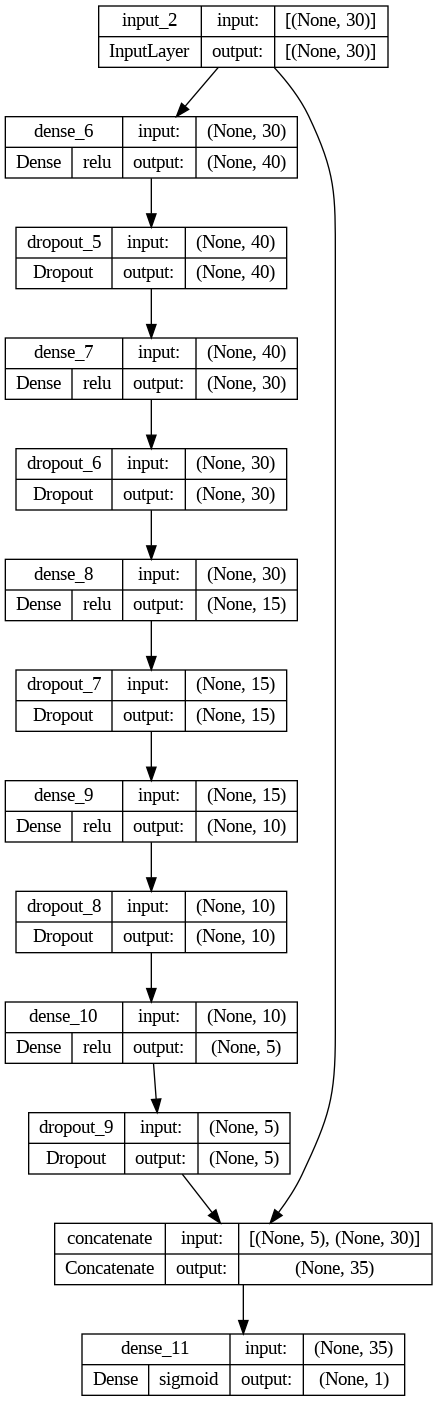

In [19]:
keras.utils.plot_model(model_f, show_shapes=True, show_layer_activations=True, to_file='ans_functional_model.png')

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
پس از ساخت مدل آن را برای ۲۰۰ دور و با اندازه‌ی دسته (batch) معادل ۳۲ آموزش دهید. همچنین بُر زدن (shuffle) داده‌ها را فعال کنید. در صورت علاقه می‌توانید به کمک آرگومان <code>validation_split</code> از بخشی از داده‌های آموزشی برای اعتبارسنجی استفاده کنید (مقدار پیشنهادی <code>0.2</code> است).
<br>
پس از آموزش مدل، مقدار <code>loss</code> و <code>accuracy</code> را برای داده‌های آموزشی و آزمون محاسبه کرده و چاپ کنید.
</font>
</p>

In [20]:
history_f = model_f.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, shuffle=True) # To-Do (Fit the model)

Epoch 1/200
12/12 [==============================] - 2s 45ms/step - loss: 3.2387 - accuracy: 0.4533 - val_loss: 3.1755 - val_accuracy: 0.5275
Epoch 2/200
12/12 [==============================] - 0s 9ms/step - loss: 2.9561 - accuracy: 0.5659 - val_loss: 2.8945 - val_accuracy: 0.5824
Epoch 3/200
12/12 [==============================] - 0s 7ms/step - loss: 2.7167 - accuracy: 0.6374 - val_loss: 2.6382 - val_accuracy: 0.6593
Epoch 4/200
12/12 [==============================] - 0s 7ms/step - loss: 2.5074 - accuracy: 0.6841 - val_loss: 2.4084 - val_accuracy: 0.6923
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 2.2995 - accuracy: 0.7308 - val_loss: 2.2034 - val_accuracy: 0.7473
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 2.1110 - accuracy: 0.7967 - val_loss: 2.0201 - val_accuracy: 0.7692
Epoch 7/200
12/12 [==============================] - 0s 5ms/step - loss: 1.9632 - accuracy: 0.8049 - val_loss: 1.8596 - val_accuracy: 0.8352
Epoch 8/200


In [21]:
loss, accuracy = model_f.evaluate(X_train, y_train, verbose=0) # To-Do (Evaluate the model on train data)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

loss, accuracy = model_f.evaluate(X_test, y_test, verbose=0) # To-Do (Evaluate the model on test data)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Train Loss: 0.1528, Train Accuracy: 0.9780
Test Loss: 0.1418, Test Accuracy: 0.9825


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir">ارزیابی مدل‌ها به همراه رسم نمودار</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای بررسی دقت عملکرد مدل‌هایی که ساخته‌اید، <code>confusion matrix</code> را رسم کنید. در ادامه نمودارهای <code>accuracy</code> بر اساس <code>epoch</code> و <code>loss</code> بر حسب <code>epoch</code> را نیز رسم کنید.
<br>
سلول‌های زیر جهت شفاف‌تر شدن و یکسان شدن تحلیل نتایج می‌باشد و فقط نام متغیرها را برای درست اجرا شدن تغییر دهید. دقت کنید که برای هر دو مدل باید اقدامات گفته شده را صورت دهید.
</font>
</p>

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
loss, accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

15/15 [==============================] - 0s 2ms/step - loss: 0.2684 - accuracy: 0.9802
Train Loss: 0.2684, Train Accuracy: 0.9802


In [24]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

4/4 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.9825
Test Loss: 0.2756, Test Accuracy: 0.9825


In [25]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 3ms/step


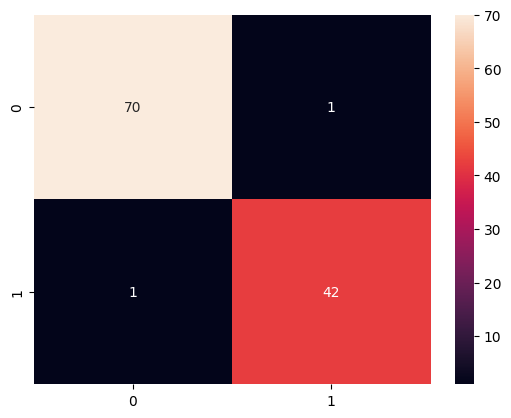

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig('confusion_Sequential.png')

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1240      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1230      
                                                                 
 dropout_1 (Dropout)         (None, 30)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                465       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                1

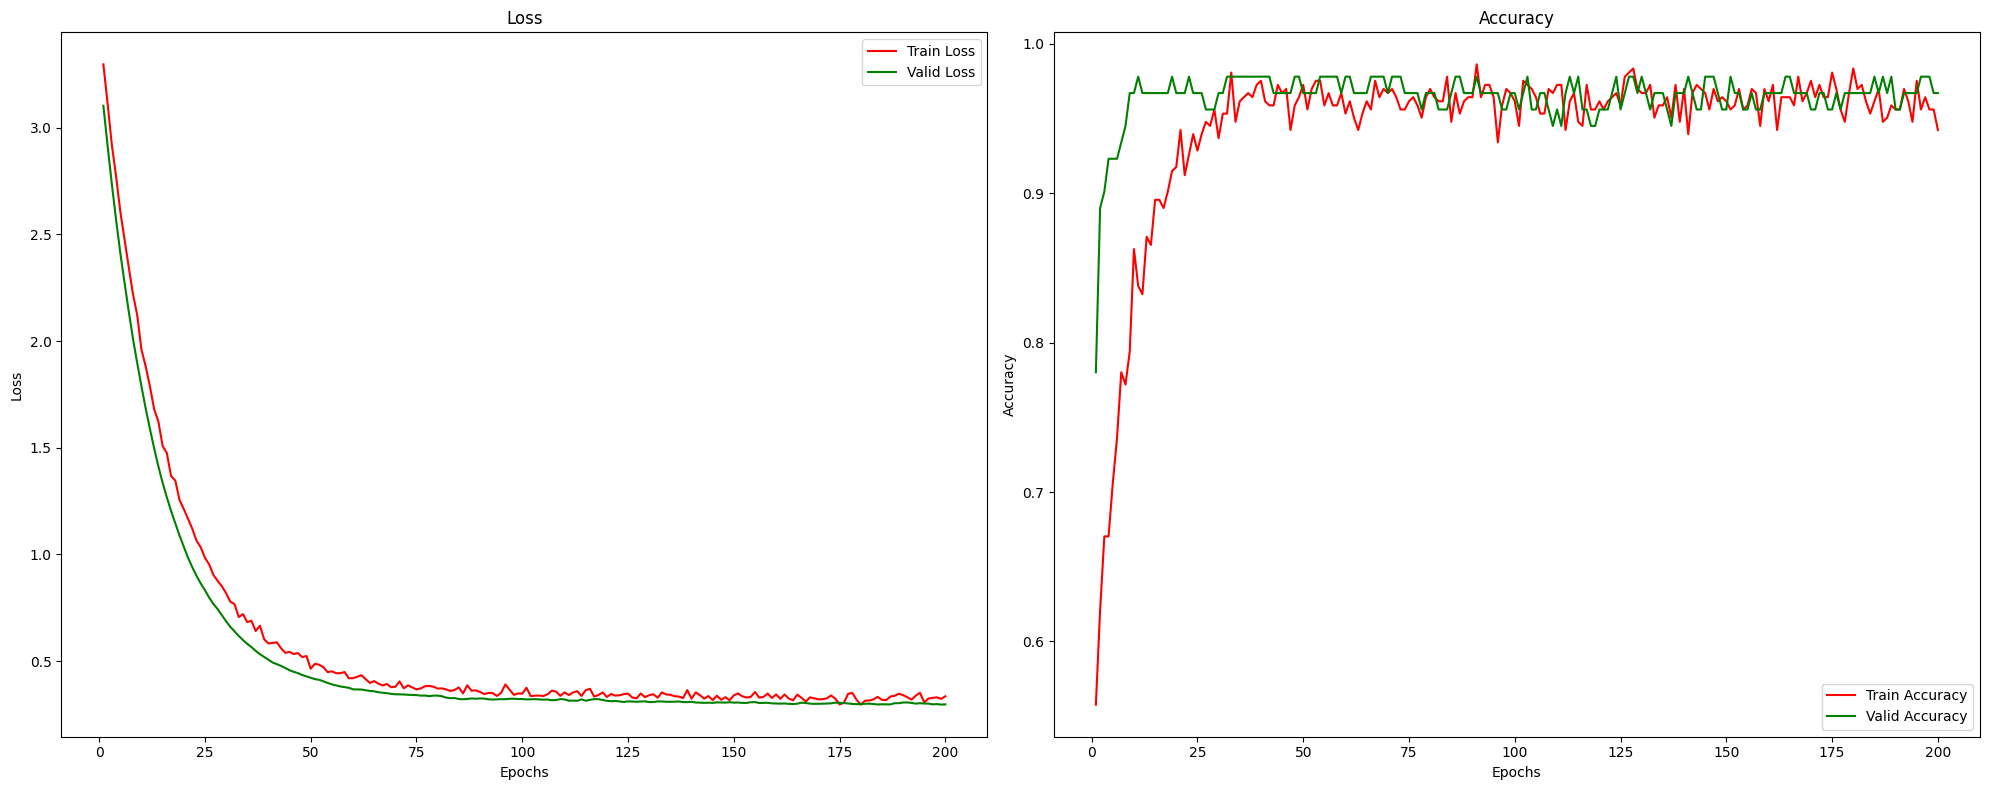

In [29]:
# Plot the accuracy and loss curves
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [30]:
# To-Do (Do the same for Functional API model)

loss, accuracy = model_f.evaluate(X_train, y_train)
print(f"Train Loss: {loss:.4f}, Train Accuracy: {accuracy:.4f}")

15/15 [==============================] - 0s 2ms/step - loss: 0.1528 - accuracy: 0.9780
Train Loss: 0.1528, Train Accuracy: 0.9780


In [31]:
loss, accuracy = model_f.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

4/4 [==============================] - 0s 3ms/step - loss: 0.1418 - accuracy: 0.9825
Test Loss: 0.1418, Test Accuracy: 0.9825


In [32]:
# Make predictions
y_pred = model_f.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 3ms/step


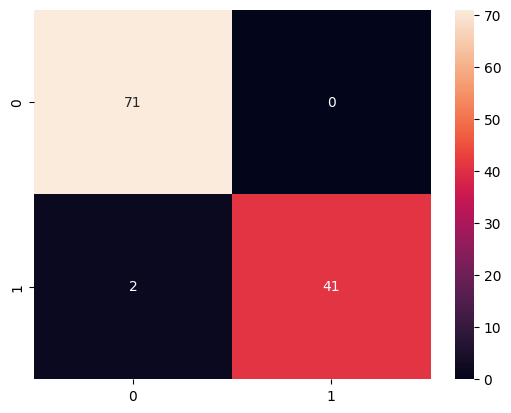

In [33]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig('confusion_Functional.png')

In [34]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [35]:
# Model summary
model_f.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 30)]                 0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 40)                   1240      ['input_2[0][0]']             
                                                                                                  
 dropout_5 (Dropout)         (None, 40)                   0         ['dense_6[0][0]']             
                                                                                                  
 dense_7 (Dense)             (None, 30)                   1230      ['dropout_5[0][0]']           
                                                                                              

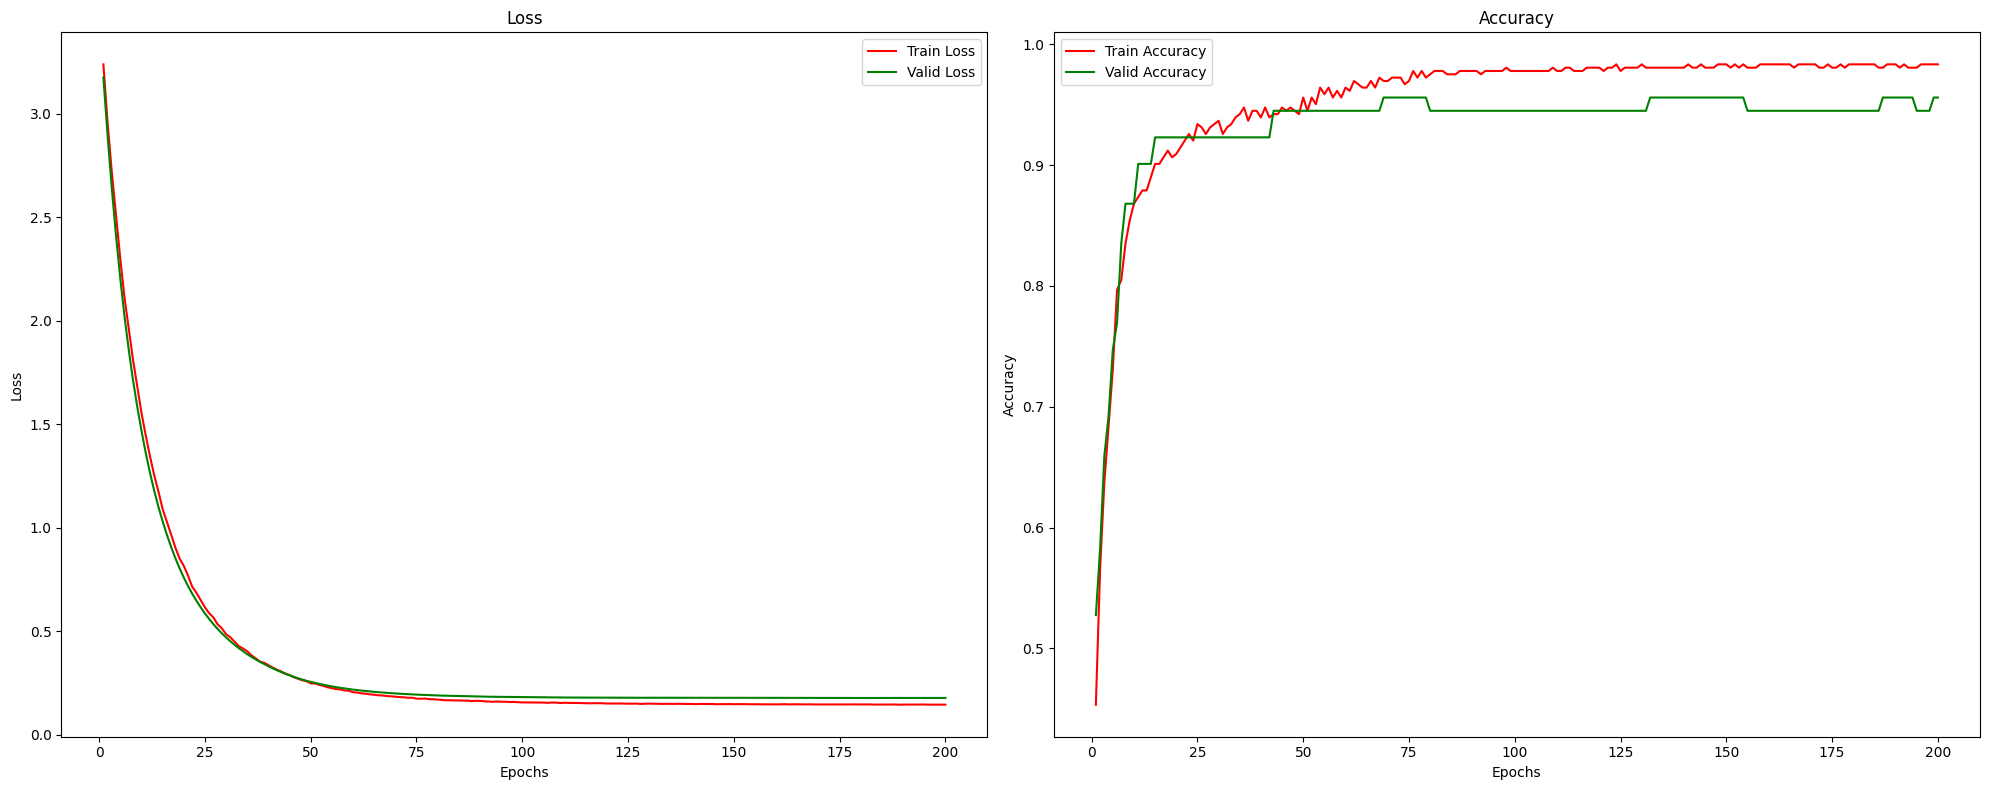

In [36]:
# Plot the accuracy and loss curves
tr_acc = history_f.history['accuracy']
tr_loss = history_f.history['loss']
val_acc = history_f.history['val_accuracy']
val_loss = history_f.history['val_loss']

epochs = [i+1 for i in range(len(tr_acc))]

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, tr_loss, 'r', label='Train Loss')
plt.plot(epochs, val_loss, 'g', label='Valid Loss')
plt.title('Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs, tr_acc, 'r', label='Train Accuracy')
plt.plot(epochs, val_acc, 'g', label='Valid Accuracy')
plt.title('Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()